In [1]:
import pandas as pd
import numpy as np

In [2]:
import numpy as np
from scipy import special
def series(X1,X2):
    return(np.float64(1)/(np.float64(1)/X1+np.float64(1)/X2))

def inms_ram_factor(Mass_amu,Speed_km_sec,Ram_Angle_deg,Azimuthal_Angle_deg):
    Ambient_Temperature_K=np.float64(70)
    Laboratory_Temperature_K=np.float64(293)
    Boltzmann_constant_J_K=np.float64(1.38066)*(10**(-23))
    Unit_mass_kg_amu=np.float64(1.6605)*(10**(-27))
    
    Mass_amu=np.float64(Mass_amu)
    Speed_km_sec=np.float64(Speed_km_sec)
    Ram_Angle_deg=np.float64(Ram_Angle_deg)
    Azimuthal_Angle_deg=np.float64(Azimuthal_Angle_deg)
    
    Cpa_km_sec=np.sqrt(np.float64(2)*Boltzmann_constant_J_K*Ambient_Temperature_K/Mass_amu/Unit_mass_kg_amu)/np.float64(1000)
    S0=Speed_km_sec/Cpa_km_sec
    S=S0*np.cos(Ram_Angle_deg*np.pi/180)
    S2=S*S*np.float64(1)
    if S2>80:
        exps2=np.float64(0)
    else:
        exps2=np.exp(-S2)
    F=exps2+np.sqrt(np.float64(np.pi))*S*(1.0+special.erf(S))
    Sp=S0*np.cos(Azimuthal_Angle_deg*np.pi/180)*np.sin(Ram_Angle_deg*np.pi/180)
    Sp2=Sp*Sp*np.float64(1)
    if Sp2>80:
        expsp2=np.float64(0)
    else:
        expsp2=np.exp(-Sp2)
    Fp=expsp2+np.sqrt(np.float64(np.pi))*Sp*(1.0+special.erf(Sp))
    A2a=np.float64(0.81)
    A2b=np.float64(0.52)
    A3a=np.float64(1.67)
    A3b=np.float64(7.16)
    A3c=np.float64(0.53)
    A3d=np.float64(2.88)
    Acs=series(A2a,A2b)+2*(series(A3a,2*A3b+A3c+4*A3d))
    A01=np.float64(1.989)
    Q1=np.float64(0.368)
    Q2=np.float64(0.648)
    Q3=np.float64(0.670)
    Q4=np.float64(1.876)
    Q5=np.float64(0.0095)
    Q6=np.float64(0.933)
    Q7=np.float64(0.742)
    Q8=np.float64(0.261)
    Q9=np.float64(44.92)
    Q10=np.float64(43.84)
    Q11=np.float64(0.021)
    Q12=np.float64(1.787)
    P1=Q9-Q10*np.exp(-Q11*S0**Q12)
    if Azimuthal_Angle_deg>90 and Azimuthal_Angle_deg<270:
        R0=Q1+(Q2-Q3*np.exp(-Q5*(S0+Q4)**2))*np.exp(-P1*(Q6*(Ram_Angle_deg*np.pi/180-Q8)**2+Q7*(Ram_Angle_deg*np.pi/180*np.tan(Azimuthal_Angle_deg*np.pi/180))**2))
    else:
        R0=Q1
    R1=Acs/(A01+Acs)
    G1=np.float64(0.191)
    G2=np.float64(0.336)
    G3=np.float64(0.396)
    G4=np.float64(1.102)
    G5=np.float64(0.200)
    R2=G1+G2*(1-np.exp(-G3*S0))*np.exp(-G4*(Ram_Angle_deg*np.pi/180)**2)+G5*np.exp(-G3*S0)
    H1=np.float64(1.047)
    H2=np.float64(0.300)
    H3=np.float64(0.220)
    H4=np.float64(0.315)
    H5=np.float64(1.143)
    H6=np.float64(0.170)
    H7=np.float64(0.300)
    H8=np.float64(1.461)
    H9=np.float64(0.210)
    H10=np.float64(0.435)
    H11=np.float64(0.100)
    H12=np.float64(0.150)
    H13=np.float64(0.900)
    j7=1-np.exp(-H10*S0)
    j8=j7*(np.cos(Azimuthal_Angle_deg*np.pi/180))**4
    j9=1+H12*j7**H11*(np.cos(Azimuthal_Angle_deg*np.pi/180))**4
    j3=1+H2*(np.cos(4*Azimuthal_Angle_deg*np.pi/180)-1)
    j5=1-H3*(j7*np.cos(4*Azimuthal_Angle_deg*np.pi/180)-1)
    j1=1+H5*j7*np.sin(Ram_Angle_deg*np.pi/180)*np.cos(Azimuthal_Angle_deg*np.pi/180)
    j2=1+H6*j7*j8*np.sin(4*j5*(Ram_Angle_deg*np.pi/180-H8)-H1*j3)
    j6=1/(H9+H13*j7*(np.cos(Azimuthal_Angle_deg*np.pi/180))**(2*j7))
    j4=1+H7*(j6-1)
    if (Azimuthal_Angle_deg>=0 and Azimuthal_Angle_deg<90)or(Azimuthal_Angle_deg>270 and Azimuthal_Angle_deg<360):
        R3=H4*j1*j2*j4*j9
    else:
        R3=0.55
    
    Source_Factor=(R0+R2*R1)*F+R3*R1*Fp
    Sensitivity_Normalization=np.sqrt(Ambient_Temperature_K/Laboratory_Temperature_K)
    INMS_Ram_Factor=Sensitivity_Normalization*Source_Factor
    return(INMS_Ram_Factor)

In [3]:
import pandas as pd
import numpy as np
#E3
#df=pd.read_csv("/Users/fumenghao/Desktop/TARGET/ENCELADUS/2008/2008_MAR_072.CSV")
#E5
#df=pd.read_csv("/Users/fumenghao/Desktop/TARGET/ENCELADUS/2008/2008_OCT_283.CSV")
#E7
#df=pd.read_csv("/Users/fumenghao/Desktop/TARGET/ENCELADUS/2009/2009_NOV_306.CSV")
#E14
df=pd.read_csv("/Users/fumenghao/Desktop/TARGET/ENCELADUS/2011/2011_OCT_274.CSV")
#E17
#df=pd.read_csv("/Users/fumenghao/Desktop/TARGET/ENCELADUS/2012/2012_MAR_087.CSV")
#E18
#df=pd.read_csv("/Users/fumenghao/Desktop/TARGET/ENCELADUS/2012/2012_APR_105.CSV")
#E21
#df=pd.read_csv("/Users/fumenghao/Desktop/TARGET/ENCELADUS/2015/2015_OCT_301.CSV")

npt=len(df)
df.index=np.arange(0,npt,1)
tca=df.time_ca/1.0E3
alt=df.alt_t
lst=df.lst_t
nlst=len(lst.values[lst.values<0])
inlst=lst[lst<0].index
if nlst>0:
    lst[inlst]=24+lst[inlst]
nlst=len(lst.values[lst.values>24])
inlst=lst[lst>24].index
if nlst>0:
    lst[inlst]=-24+lst[inlst]
sza=df.sza_t
lsts=df.lst_s
nlst=len(lsts.values[lsts.values<0])
inlst=lsts[lsts<0].index
if nlst>0:
    lsts[inlst]=24+lsts[inlst]
nlst=len(lsts.values[lsts.values>24])
inlst=lsts[lsts>24].index
if nlst>0:
    lsts[inlst]=-24+lsts[inlst]
szas=df.sza_s
lat=np.arcsin(df.sc_pos_t_z/np.sqrt(df.sc_pos_t_x**2+df.sc_pos_t_y**2+df.sc_pos_t_z**2))*180/np.pi
lon=360-np.arccos(df.sc_pos_t_x/np.sqrt(df.sc_pos_t_x**2+df.sc_pos_t_y**2))*180/np.pi
nlon=len(df.sc_pos_t_y.values[df.sc_pos_t_y.values<0])
inlon=df.sc_pos_t_y[df.sc_pos_t_y<0].index
if nlon>0:
    lon[inlon]=360-lon[inlon]
cnt=df.c1counts
vsc=np.sqrt((df.sc_vel_t_scx)**2+(df.sc_vel_t_scy)**2+(df.sc_vel_t_scz)**2)
apt=(180/np.pi)*np.arccos(-df.sc_vel_t_scx/vsc)
ven=(180/np.pi)*np.arccos(-df.sc_vel_t_scy/vsc)
azm=pd.Series(np.float32(0),df.index)
nvsc=len(((df.sc_vel_t_scy)**2+(df.sc_vel_t_scz)**2).values[((df.sc_vel_t_scy)**2+(df.sc_vel_t_scz)**2).values>0])
ivsc=((df.sc_vel_t_scy)**2+(df.sc_vel_t_scz)**2)[((df.sc_vel_t_scy)**2+(df.sc_vel_t_scz)**2)>0].index
if nvsc>0:
    azm[ivsc]=(180/np.pi)*np.arccos(-(df.sc_vel_t_scy)[ivsc]/np.sqrt((df.sc_vel_t_scy)[ivsc]**2+(df.sc_vel_t_scz)[ivsc]**2))
nneg=len(df.sc_vel_t_scz.values[df.sc_vel_t_scz.values<0])
ineg=df.sc_vel_t_scz[df.sc_vel_t_scz<0].index
if nneg>0:
    azm[ineg]=360-azm[ineg]
ram1=pd.Series(np.float64(0),df.index)
ram2=pd.Series(np.float64(0),df.index)
for i in np.arange(0,npt,1):
    ram1[i]=inms_ram_factor(18,vsc[i],apt[i],azm[i])
    ram2[i]=inms_ram_factor(44,vsc[i],apt[i],azm[i])
#以上是df中所有数据重新编序号后算的对应的参数（数据有多少参数就有多少个）

dists=df.distance_s
sclk=df.sclk
target=df.target
source=df.source
mass_per_charge=df.mass_per_charge #这一条是新增的

want=pd.concat([alt,apt,vsc,tca,source],axis=1)
want.columns="alt","apt","vsc","tca","source"
#want=want[(want.tca>-50)&(want.tca<150)]    #E3,E5
want=want[(want.tca>-50)&(want.tca<50)]      #E7,E14,E17,E18
want=want[(want.apt<=75)&(want.vsc>0)]
#want=want[(want.source=='csn')|(want.source=='osi')]
want=want[(want.source=="csn")]

idx=want.index
#
tca=tca[idx]
alt=alt[idx]
lst=lst[idx]
sza=sza[idx]
lsts=lsts[idx]
szas=szas[idx]
lat=lat[idx]
lon=lon[idx]
cnt=cnt[idx]
vsc=vsc[idx]
apt=apt[idx]
ven=ven[idx]
azm=azm[idx]
ram1=ram1[idx]
ram2=ram2[idx]
err=np.sqrt(cnt)
#以上是在保持数据编号不动的情况下抽选出来的符合条件的参数

dists=dists[idx]
sclk=sclk[idx]
target=target[idx]
source=source[idx]
mass_per_charge=mass_per_charge[idx]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in double_scalars


In [4]:
#作第一张表h2o
h2o=pd.concat([mass_per_charge,cnt,err,tca,alt,lat,lon,lst,sza,lsts,szas,apt,ven,azm,ram1,vsc],axis=1)
h2o.columns=(["mass_per_charge","cnt","err","tca","alt","lat","lon","lst","sza","lsts","szas","apt","ven","azm","ram1","vsc"])
h2o=h2o[(h2o.mass_per_charge==18)&(h2o.cnt>0)]          
dens1=h2o.cnt/(31.021E-3)/((4.6960E-04)/1.55)/h2o.ram1    
errs1=h2o.err/(31.021E-3)/((4.6960E-04)/1.55)/h2o.ram1    
#我是想着先删掉前三列再把密度和uncertainty插进表里去
h2o=h2o.drop(["mass_per_charge","cnt","err"],axis=1)
h2o.insert(2,"dens1",dens1)
h2o.insert(3,"errs1",errs1)
h2o.index=np.arange(0,len(h2o),1)

#作第二张表co2
co2=pd.concat([mass_per_charge,cnt,err,tca,alt,lat,lon,lst,sza,lsts,szas,apt,ven,azm,ram2,vsc],axis=1)
co2.columns=(["mass_per_charge","cnt","err","tca","alt","lat","lon","lst","sza","lsts","szas","apt","ven","azm","ram2","vsc"])
co2=co2[(co2.mass_per_charge==44)&(co2.cnt>0)]         
dens2=co2.cnt/(31.021E-3)/((5.5590E-04)/1.55)/co2.ram2
errs2=co2.err/(31.021E-3)/((5.5590E-04)/1.55)/co2.ram2
#我是想着先删掉前三列再把密度和uncertainty插进表里去
co2=co2.drop(["mass_per_charge","cnt","err"],axis=1)
co2.insert(2,"dens2",dens2)
co2.insert(3,"errs2",errs2)
co2.index=np.arange(0,len(co2),1)

In [5]:
#co2.to_csv("/Users/fumenghao/Desktop/h2o.CSV",index=False)

In [6]:
#去ice grain
#E3
#co2=co2.drop(co2.index[[20,24,25,35,40]])
#co2.index=np.arange(0,len(co2),1)
#E5
#co2=co2.drop(co2.index[[39]])
#co2.index=np.arange(0,len(co2),1)
#E7
#co2=co2.drop(co2.index[[28]])
#co2.index=np.arange(0,len(co2),1)
#E14
co2=co2.drop(co2.index[[51,83,84,85,113,151,165,171,199,230,275,279,323,343,344,373]])
co2.index=np.arange(0,len(co2),1)
#E17
#co2=co2.drop(co2.index[[136,186,190,201,252,265,285,295,302,216,221]])
#co2.index=np.arange(0,len(co2),1)
#E18
#co2=co2.drop(co2.index[[64,99,128,142,146,147,154,162,170,180,190,208,213,222,228,239,285,300,302,316,344,352,368]])              
#co2.index=np.arange(0,len(co2),1)

In [7]:
#co2.to_csv("/Users/fumenghao/Desktop/E17.CSV",index=False)

In [8]:
#去掉不需要拟合的点
#E14
co2_2=co2
#E17
#co2_2=co2.drop(co2.index[[201,202,203,204]])#, 191,192,194]])
#co2_2.index=np.arange(0,len(co2_2),1)
#E18
#co2_2=co2.drop(co2.index[[205,206,207,208]])
#co2_2.index=np.arange(0,len(co2_2),1)

#co2.to_csv("/Users/fumenghao/Desktop/co2.CSV",index=False)

In [9]:
#我们先用co2的数据
co2_2=pd.concat([co2_2.tca,co2_2.alt,co2_2.dens2,co2_2.errs2,co2_2.lat,co2_2.lon,co2_2.lst,co2_2.sza,co2_2.lsts,co2_2.szas],axis=1)
co2_2.columns=(["tca","alt","dens","errs","lat","lon","lst","sza","lsts","szas"])

In [10]:
#计算r的大小 #输入角度转弧度
def distance(R,lat_p,lon_p,lat_q,lon_q,h):
    z_p=R*np.sin(lat_p*np.pi/180)
    x_p=R*np.cos(lat_p*np.pi/180)*np.cos(np.pi/180*(360-lon_p))
    y_p=R*np.cos(lat_p*np.pi/180)*np.sin(np.pi/180*(360-lon_p))
    z_q=(R+h)*np.sin(lat_q*np.pi/180)
    x_q=(R+h)*np.cos(lat_q*np.pi/180)*np.cos(np.pi/180*(360-lon_q))
    y_q=(R+h)*np.cos(lat_q*np.pi/180)*np.sin(np.pi/180*(360-lon_q))
    Distance=np.sqrt((z_p-z_q)**2+(x_p-x_q)**2+(y_p-y_q)**2) 
    return(Distance)

In [11]:
r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52,r53,r54,r55,r56,r57,r58,r59,r60,r61,r62,r63,r64,r65,r66,r67,r68,r69,r70,r71,r72,r73,r74,r75,r76,r77,r78,r79,r80,r81,r82,r83,r84,r85,r86,r87,r88,r89,r90,r91,r92,r93,r94,r95,r96,r97,r98=pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index)
for j in np.arange(0,len(co2_2),1):
    r1[j]=distance(252.1,-75.82,56.78,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r2[j]=distance(252.1,-75.93,57.43,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r3[j]=distance(252.1,-76.25,58.64,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r4[j]=distance(252.1,-76.81,62.59,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r5[j]=distance(252.1,-77.56,65.19,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r6[j]=distance(252.1,-78.44,70.08,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r7[j]=distance(252.1,-80.24,81.40,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r8[j]=distance(252.1,-81.08,83.31,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r9[j]=distance(252.1,-81.98,88.83,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r10[j]=distance(252.1,-83.08,98.01,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r11[j]=distance(252.1,-83.07,104.90,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r12[j]=distance(252.1,-83.20,116.30,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r13[j]=distance(252.1,-82.85,128.22,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r14[j]=distance(252.1,-82.55,135.22,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r15[j]=distance(252.1,-82.17,146.37,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r16[j]=distance(252.1,-81.29,155.01,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r17[j]=distance(252.1,-80.62,161.11,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r18[j]=distance(252.1,-79.04,173.53,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r19[j]=distance(252.1,-77.51,176.84,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r20[j]=distance(252.1,-76.72,178.43,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r21[j]=distance(252.1,-76.17,183.83,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r22[j]=distance(252.1,-72.59,180.39,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r23[j]=distance(252.1,-72.81,199.92,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r24[j]=distance(252.1,-71.51,201.00,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r25[j]=distance(252.1,-75.30,33.31,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r26[j]=distance(252.1,-75.99,32.75,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r27[j]=distance(252.1,-77.18,30.20,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r28[j]=distance(252.1,-77.95,30.64,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r29[j]=distance(252.1,-78.76,31.73,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r30[j]=distance(252.1,-79.18,29.44,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r31[j]=distance(252.1,-80.38,29.65,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r32[j]=distance(252.1,-81.16,25.96,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r33[j]=distance(252.1,-82.83,22.04,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r34[j]=distance(252.1,-84.42,17.36,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r35[j]=distance(252.1,-84.40,16.76,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r36[j]=distance(252.1,-85.15,11.87,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r37[j]=distance(252.1,-86.19,11.50,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r38[j]=distance(252.1,-86.98,6.89,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r39[j]=distance(252.1,-88.25,358.17,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r40[j]=distance(252.1,-88.72,339.63,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r41[j]=distance(252.1,-89.21,322.42,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r42[j]=distance(252.1,-88.80,272.23,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r43[j]=distance(252.1,-87.85,239.35,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r44[j]=distance(252.1,-86.14,232.38,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r45[j]=distance(252.1,-84.00,228.81,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r46[j]=distance(252.1,-82.98,226.93,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r47[j]=distance(252.1,-80.76,230.20,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r48[j]=distance(252.1,-79.02,228.28,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r49[j]=distance(252.1,-77.64,228.12,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r50[j]=distance(252.1,-75.69,229.55,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r51[j]=distance(252.1,-72.45,227.42,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r52[j]=distance(252.1,-71.42,224.77,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r53[j]=distance(252.1,-70.92,225.61,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r54[j]=distance(252.1,-77.70,16.09,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r55[j]=distance(252.1,-78.54,18.00,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r56[j]=distance(252.1,-79.52,13.81,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r57[j]=distance(252.1,-80.46,13.78,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r58[j]=distance(252.1,-81.72,14.73,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r59[j]=distance(252.1,-82.69,15.80,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r60[j]=distance(252.1,-76.11,348.33,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r61[j]=distance(252.1,-76.56,343.99,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r62[j]=distance(252.1,-77.50,339.72,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r63[j]=distance(252.1,-77.96,336.33,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r64[j]=distance(252.1,-77.94,332.02,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r65[j]=distance(252.1,-78.88,327.56,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r66[j]=distance(252.1,-78.56,323.82,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r67[j]=distance(252.1,-78.82,321.01,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r68[j]=distance(252.1,-79.69,314.97,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r69[j]=distance(252.1,-79.86,310.73,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r70[j]=distance(252.1,-80.25,304.77,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r71[j]=distance(252.1,-80.31,302.85,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r72[j]=distance(252.1,-79.90,294.38,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r73[j]=distance(252.1,-80.32,291.57,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r74[j]=distance(252.1,-80.49,283.19,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r75[j]=distance(252.1,-79.97,277.06,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r76[j]=distance(252.1,-79.82,272.63,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r77[j]=distance(252.1,-77.95,263.80,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r78[j]=distance(252.1,-76.99,260.62,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r79[j]=distance(252.1,-76.39,255.44,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r80[j]=distance(252.1,-75.14,251.73,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r81[j]=distance(252.1,-73.14,249.07,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r82[j]=distance(252.1,-72.43,246.77,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r83[j]=distance(252.1,-71.97,337.85,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r84[j]=distance(252.1,-72.87,337.20,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r85[j]=distance(252.1,-73.60,336.59,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r86[j]=distance(252.1,-74.64,336.34,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r87[j]=distance(252.1,-75.55,333.09,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r88[j]=distance(252.1,-76.55,329.33,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r89[j]=distance(252.1,-75.07,116.16,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r90[j]=distance(252.1,-74.56,153.20,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r91[j]=distance(252.1,-73.17,156.72,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r92[j]=distance(252.1,-70.56,164.46,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r93[j]=distance(252.1,-69.58,165.51,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r94[j]=distance(252.1,-74.10,184.81,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r95[j]=distance(252.1,-74.07,199.21,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r96[j]=distance(252.1,-72.99,33.13,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r97[j]=distance(252.1,-74.04,32.78,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])
    r98[j]=distance(252.1,-75.95,131.55,co2_2.lat[j],co2_2.lon[j],co2_2.alt[j])    
#将r并入表H2O_1中
co2_2["r1"],co2_2["r2"],co2_2["r3"],co2_2["r4"],co2_2["r5"],co2_2["r6"],co2_2["r7"],co2_2["r8"],co2_2["r9"],co2_2["r10"],co2_2["r11"],co2_2["r12"],co2_2["r13"],co2_2["r14"],co2_2["r15"],co2_2["r16"],co2_2["r17"],co2_2["r18"],co2_2["r19"],co2_2["r20"],co2_2["r21"],co2_2["r22"],co2_2["r23"],co2_2["r24"],co2_2["r25"],co2_2["r26"],co2_2["r27"],co2_2["r28"],co2_2["r29"],co2_2["r30"],co2_2["r31"],co2_2["r32"],co2_2["r33"],co2_2["r34"],co2_2["r35"],co2_2["r36"],co2_2["r37"],co2_2["r38"],co2_2["r39"],co2_2["r40"],co2_2["r41"],co2_2["r42"],co2_2["r43"],co2_2["r44"],co2_2["r45"],co2_2["r46"],co2_2["r47"],co2_2["r48"],co2_2["r49"],co2_2["r50"],co2_2["r51"],co2_2["r52"],co2_2["r53"],co2_2["r54"],co2_2["r55"],co2_2["r56"],co2_2["r57"],co2_2["r58"],co2_2["r59"],co2_2["r60"],co2_2["r61"],co2_2["r62"],co2_2["r63"],co2_2["r64"],co2_2["r65"],co2_2["r66"],co2_2["r67"],co2_2["r68"],co2_2["r69"],co2_2["r70"],co2_2["r71"],co2_2["r72"],co2_2["r73"],co2_2["r74"],co2_2["r75"],co2_2["r76"],co2_2["r77"],co2_2["r78"],co2_2["r79"],co2_2["r80"],co2_2["r81"],co2_2["r82"],co2_2["r83"],co2_2["r84"],co2_2["r85"],co2_2["r86"],co2_2["r87"],co2_2["r88"],co2_2["r89"],co2_2["r90"],co2_2["r91"],co2_2["r92"],co2_2["r93"],co2_2["r94"],co2_2["r95"],co2_2["r96"],co2_2["r97"],co2_2["r98"]=r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52,r53,r54,r55,r56,r57,r58,r59,r60,r61,r62,r63,r64,r65,r66,r67,r68,r69,r70,r71,r72,r73,r74,r75,r76,r77,r78,r79,r80,r81,r82,r83,r84,r85,r86,r87,r88,r89,r90,r91,r92,r93,r94,r95,r96,r97,r98

In [12]:
#计算r与喷射方向的夹角thet（精细结构） #输入角度转弧度 
def kado(R,lat_p,lon_p,tilt_azimuth,tilt_zenith,lat_q,lon_q,h,r):
    #求PQ两点的直角坐标
    z_p=R*np.sin(lat_p*np.pi/180)
    x_p=R*np.cos(lat_p*np.pi/180)*np.cos(np.pi/180*(360-lon_p))
    y_p=R*np.cos(lat_p*np.pi/180)*np.sin(np.pi/180*(360-lon_p))
    z_q=(R+h)*np.sin(lat_q*np.pi/180)
    x_q=(R+h)*np.cos(lat_q*np.pi/180)*np.cos(np.pi/180*(360-lon_q))
    y_q=(R+h)*np.cos(lat_q*np.pi/180)*np.sin(np.pi/180*(360-lon_q))
    #算r在球坐标系下的的zenith
    x_o=0
    y_o=0
    z_o=0
    z_pq=z_q-z_p
    x_pq=x_q-x_p
    y_pq=y_q-y_p
    z_op=z_p-z_o
    x_op=x_p-x_o
    y_op=y_p-y_o
    op_pq=x_op*x_pq+y_op*y_pq+z_op*z_pq
    op=np.sqrt(x_op**2+y_op**2+z_op**2)
    pq=np.sqrt(x_pq**2+y_pq**2+z_pq**2)
    r_zenith=np.arccos(op_pq/(op*pq))
    #判断若喷射方向为normal的时候是否对目标点有影响   
    if r_zenith >=0 and r_zenith <=(np.pi/2):
        #计算r的azimuth
        t=1-(x_p*x_q+y_p*y_q+z_p*z_q)/(R**2)
        x_q1=x_p*t+x_q
        y_q1=y_p*t+y_q
        z_q1=z_p*t+z_q
        #p不位于两极
        if z_p <0:
            x_s=0
            y_s=0
            z_s=(R**2)/z_p
            x_direc=x_p-x_s
            y_direc=y_p-y_s
            z_direc=z_p-z_s
        elif z_p >0:
            x_n=0
            y_n=0
            z_n=(R**2)/z_p
            x_direc=x_n-x_p
            y_direc=y_n-y_p
            z_direc=z_n-z_p
        else:
            x_direc=0
            y_direc=0
            z_direc=1
        x_pq1=x_q1-x_p
        y_pq1=y_q1-y_p
        z_pq1=z_q1-z_p        
        pq1_pdirec=x_pq1*x_direc+y_pq1*y_direc+z_pq1*z_direc
        pq1=np.sqrt(x_pq1**2+y_pq1**2+z_pq1**2)
        pdirec=np.sqrt(x_direc**2+y_direc**2+z_direc**2)
        r_azimuth=np.arccos(pq1_pdirec/(pq1*pdirec))  #r_azimuth从0到pi
        #在2pi度范围内判断azimuth，用到的是点面关系，应该用pon面
        #p不位于两极
        x_normal=R*y_p
        y_normal=-R*x_p
        z_normal=0
        dot=x_pq*x_normal+y_pq*y_normal+z_pq*z_normal
        if r_azimuth !=0 and r_azimuth !=np.pi:
            if dot >0:
                r_azimuth=2*np.pi-r_azimuth
            else:
                r_azimuth=r_azimuth
        else:
            r_azimuth=r_azimuth
        #计算r与喷射方向的夹角thet
        x1=np.sin(r_zenith)*np.cos(r_azimuth)
        y1=np.sin(r_zenith)*np.sin(r_azimuth)
        z1=np.cos(r_zenith)
        x2=np.sin(tilt_zenith*np.pi/180)*np.cos(tilt_azimuth*np.pi/180)
        y2=np.sin(tilt_zenith*np.pi/180)*np.sin(tilt_azimuth*np.pi/180)
        z2=np.cos(tilt_zenith*np.pi/180) 
        Kado=np.arccos(x1*x2+y1*y2+z1*z2)
        return(Kado)
    else:
        #return(np.float("NaN"))
        return(np.float(100))

In [13]:
theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,theta10,theta11,theta12,theta13,theta14,theta15,theta16,theta17,theta18,theta19,theta20,theta21,theta22,theta23,theta24,theta25,theta26,theta27,theta28,theta29,theta30,theta31,theta32,theta33,theta34,theta35,theta36,theta37,theta38,theta39,theta40,theta41,theta42,theta43,theta44,theta45,theta46,theta47,theta48,theta49,theta50,theta51,theta52,theta53,theta54,theta55,theta56,theta57,theta58,theta59,theta60,theta61,theta62,theta63,theta64,theta65,theta66,theta67,theta68,theta69,theta70,theta71,theta72,theta73,theta74,theta75,theta76,theta77,theta78,theta79,theta80,theta81,theta82,theta83,theta84,theta85,theta86,theta87,theta88,theta89,theta90,theta91,theta92,theta93,theta94,theta95,theta96,theta97,theta98=pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index),pd.Series(np.float64(0),co2_2.index) 
for k in np.arange(0,len(co2_2),1):
    theta1[k]=kado(252.1,-75.82,56.78,36,28,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r1[k])
    theta2[k]=kado(252.1,-75.93,57.43,341,3,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r2[k])
    theta3[k]=kado(252.1,-76.25,58.64,236,10,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r3[k])
    theta4[k]=kado(252.1,-76.81,62.59,160,12,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r4[k])
    theta5[k]=kado(252.1,-77.56,65.19,234,33,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r5[k])
    theta6[k]=kado(252.1,-78.44,70.08,143,20,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r6[k])
    theta7[k]=kado(252.1,-80.24,81.40,184,7,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r7[k])
    theta8[k]=kado(252.1,-81.08,83.31,14,2,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r8[k])
    theta9[k]=kado(252.1,-81.98,88.83,260,1,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r9[k])
    theta10[k]=kado(252.1,-83.08,98.01,262,47,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r10[k])
    theta11[k]=kado(252.1,-83.07,104.90,246,10,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r11[k])
    theta12[k]=kado(252.1,-83.20,116.30,124,20,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r12[k])
    theta13[k]=kado(252.1,-82.85,128.22,280,29,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r13[k])
    theta14[k]=kado(252.1,-82.55,135.22,293,38,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r14[k])
    theta15[k]=kado(252.1,-82.17,146.37,241,29,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r15[k])
    theta16[k]=kado(252.1,-81.29,155.01,216,15,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r16[k])
    theta17[k]=kado(252.1,-80.62,161.11,312,13,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r17[k])
    theta18[k]=kado(252.1,-79.04,173.53,234,20,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r18[k])
    theta19[k]=kado(252.1,-77.51,176.84,220,15,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r19[k])
    theta20[k]=kado(252.1,-76.72,178.43,144,4,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r20[k])
    theta21[k]=kado(252.1,-76.17,183.83,107,10,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r21[k])
    theta22[k]=kado(252.1,-72.59,180.39,97,8,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r22[k])
    theta23[k]=kado(252.1,-72.81,199.92,15,3,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r23[k])
    theta24[k]=kado(252.1,-71.51,201.00,72,8,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r24[k])
    theta25[k]=kado(252.1,-75.30,33.31,344,6,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r25[k])
    theta26[k]=kado(252.1,-75.99,32.75,85,8,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r26[k])
    theta27[k]=kado(252.1,-77.18,30.20,250,12,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r27[k])
    theta28[k]=kado(252.1,-77.95,30.64,62,10,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r28[k])
    theta29[k]=kado(252.1,-78.76,31.73,117,8,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r29[k])
    theta30[k]=kado(252.1,-79.18,29.44,12,30,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r30[k])
    theta31[k]=kado(252.1,-80.38,29.65,9,6,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r31[k])
    theta32[k]=kado(252.1,-81.16,25.96,208,3,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r32[k])
    theta33[k]=kado(252.1,-82.83,22.04,248,11,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r33[k])
    theta34[k]=kado(252.1,-84.42,17.36,229,8,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r34[k])
    theta35[k]=kado(252.1,-84.40,16.76,299,31,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r35[k])
    theta36[k]=kado(252.1,-85.15,11.87,156,13,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r36[k])
    theta37[k]=kado(252.1,-86.19,11.50,62,4,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r37[k])
    theta38[k]=kado(252.1,-86.98,6.89,95,3,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r38[k])
    theta39[k]=kado(252.1,-88.25,358.17,182,3,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r39[k])
    theta40[k]=kado(252.1,-88.72,339.63,44,4,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r40[k])
    theta41[k]=kado(252.1,-89.21,322.42,6,62,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r41[k])
    theta42[k]=kado(252.1,-88.80,272.23,102,4,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r42[k])
    theta43[k]=kado(252.1,-87.85,239.35,42,24,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r43[k])
    theta44[k]=kado(252.1,-86.14,232.38,44,21,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r44[k])
    theta45[k]=kado(252.1,-84.00,228.81,279,10,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r45[k])
    theta46[k]=kado(252.1,-82.98,226.93,120,5,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r46[k])
    theta47[k]=kado(252.1,-80.76,230.20,62,14,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r47[k])
    theta48[k]=kado(252.1,-79.02,228.28,247,14,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r48[k])
    theta49[k]=kado(252.1,-77.64,228.12,77,23,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r49[k])
    theta50[k]=kado(252.1,-75.69,229.55,234,12,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r50[k])
    theta51[k]=kado(252.1,-72.45,227.42,262,17,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r51[k])
    theta52[k]=kado(252.1,-71.42,224.77,47,13,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r52[k])
    theta53[k]=kado(252.1,-70.92,225.61,266,21,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r53[k])
    theta54[k]=kado(252.1,-77.70,16.09,254,6,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r54[k])
    theta55[k]=kado(252.1,-78.54,18.00,245,5,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r55[k])
    theta56[k]=kado(252.1,-79.52,13.81,205,2,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r56[k])
    theta57[k]=kado(252.1,-80.46,13.78,33,10,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r57[k])
    theta58[k]=kado(252.1,-81.72,14.73,42,12,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r58[k])
    theta59[k]=kado(252.1,-82.69,15.80,229,8,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r59[k])
    theta60[k]=kado(252.1,-76.11,348.33,183,11,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r60[k])
    theta61[k]=kado(252.1,-76.56,343.99,179,12,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r61[k])
    theta62[k]=kado(252.1,-77.50,339.72,181,11,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r62[k])
    theta63[k]=kado(252.1,-77.96,336.33,273,7,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r63[k])
    theta64[k]=kado(252.1,-77.94,332.02,359,6,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r64[k])
    theta65[k]=kado(252.1,-78.88,327.56,127,54,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r65[k])
    theta66[k]=kado(252.1,-78.56,323.82,339,24,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r66[k])
    theta67[k]=kado(252.1,-78.82,321.01,343,7,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r67[k])
    theta68[k]=kado(252.1,-79.69,314.97,72,4,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r68[k])
    theta69[k]=kado(252.1,-79.86,310.73,20,7,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r69[k])
    theta70[k]=kado(252.1,-80.25,304.77,38,5,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r70[k])
    theta71[k]=kado(252.1,-80.31,302.85,277,35,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r71[k])
    theta72[k]=kado(252.1,-79.90,294.38,111,56,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r72[k])
    theta73[k]=kado(252.1,-80.32,291.57,184,23,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r73[k])
    theta74[k]=kado(252.1,-80.49,283.19,355,6,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r74[k])
    theta75[k]=kado(252.1,-79.97,277.06,323,8,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r75[k])
    theta76[k]=kado(252.1,-79.82,272.63,73,19,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r76[k])
    theta77[k]=kado(252.1,-77.95,263.80,234,22,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r77[k])
    theta78[k]=kado(252.1,-76.99,260.62,101,31,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r78[k])
    theta79[k]=kado(252.1,-76.39,255.44,223,4,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r79[k])
    theta80[k]=kado(252.1,-75.14,251.73,267,11,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r80[k])
    theta81[k]=kado(252.1,-73.14,249.07,268,9,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r81[k])
    theta82[k]=kado(252.1,-72.43,246.77,74,27,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r82[k])
    theta83[k]=kado(252.1,-71.97,337.85,355,13,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r83[k])
    theta84[k]=kado(252.1,-72.87,337.20,2,7,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r84[k])
    theta85[k]=kado(252.1,-73.60,336.59,360,10,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r85[k])
    theta86[k]=kado(252.1,-74.64,336.34,6,13,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r86[k])
    theta87[k]=kado(252.1,-75.55,333.09,9,12,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r87[k])
    theta88[k]=kado(252.1,-76.55,329.33,51,12,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r88[k])
    theta89[k]=kado(252.1,-75.07,116.16,157,7,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r89[k])
    theta90[k]=kado(252.1,-74.56,153.20,223,14,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r90[k])
    theta91[k]=kado(252.1,-73.17,156.72,82,20,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r91[k])
    theta92[k]=kado(252.1,-70.56,164.46,85,23,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r92[k])
    theta93[k]=kado(252.1,-69.58,165.51,84,21,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r93[k])
    theta94[k]=kado(252.1,-74.10,184.81,106,9,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r94[k])
    theta95[k]=kado(252.1,-74.07,199.21,277,42,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r95[k])
    theta96[k]=kado(252.1,-72.99,33.13,49,60,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r96[k])
    theta97[k]=kado(252.1,-74.04,32.78,263,7,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r97[k])
    theta98[k]=kado(252.1,-75.95,131.55,239,5,co2_2.lat[k],co2_2.lon[k],co2_2.alt[k],co2_2.r98[k])    
#将theta并入表H2O_1中
co2_2["theta1"],co2_2["theta2"],co2_2["theta3"],co2_2["theta4"],co2_2["theta5"],co2_2["theta6"],co2_2["theta7"],co2_2["theta8"],co2_2["theta9"],co2_2["theta10"],co2_2["theta11"],co2_2["theta12"],co2_2["theta13"],co2_2["theta14"],co2_2["theta15"],co2_2["theta16"],co2_2["theta17"],co2_2["theta18"],co2_2["theta19"],co2_2["theta20"],co2_2["theta21"],co2_2["theta22"],co2_2["theta23"],co2_2["theta24"],co2_2["theta25"],co2_2["theta26"],co2_2["theta27"],co2_2["theta28"],co2_2["theta29"],co2_2["theta30"],co2_2["theta31"],co2_2["theta32"],co2_2["theta33"],co2_2["theta34"],co2_2["theta35"],co2_2["theta36"],co2_2["theta37"],co2_2["theta38"],co2_2["theta39"],co2_2["theta40"],co2_2["theta41"],co2_2["theta42"],co2_2["theta43"],co2_2["theta44"],co2_2["theta45"],co2_2["theta46"],co2_2["theta47"],co2_2["theta48"],co2_2["theta49"],co2_2["theta50"],co2_2["theta51"],co2_2["theta52"],co2_2["theta53"],co2_2["theta54"],co2_2["theta55"],co2_2["theta56"],co2_2["theta57"],co2_2["theta58"],co2_2["theta59"],co2_2["theta60"],co2_2["theta61"],co2_2["theta62"],co2_2["theta63"],co2_2["theta64"],co2_2["theta65"],co2_2["theta66"],co2_2["theta67"],co2_2["theta68"],co2_2["theta69"],co2_2["theta70"],co2_2["theta71"],co2_2["theta72"],co2_2["theta73"],co2_2["theta74"],co2_2["theta75"],co2_2["theta76"],co2_2["theta77"],co2_2["theta78"],co2_2["theta79"],co2_2["theta80"],co2_2["theta81"],co2_2["theta82"],co2_2["theta83"],co2_2["theta84"],co2_2["theta85"],co2_2["theta86"],co2_2["theta87"],co2_2["theta88"],co2_2["theta89"],co2_2["theta90"],co2_2["theta91"],co2_2["theta92"],co2_2["theta93"],co2_2["theta94"],co2_2["theta95"],co2_2["theta96"],co2_2["theta97"],co2_2["theta98"]=theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,theta10,theta11,theta12,theta13,theta14,theta15,theta16,theta17,theta18,theta19,theta20,theta21,theta22,theta23,theta24,theta25,theta26,theta27,theta28,theta29,theta30,theta31,theta32,theta33,theta34,theta35,theta36,theta37,theta38,theta39,theta40,theta41,theta42,theta43,theta44,theta45,theta46,theta47,theta48,theta49,theta50,theta51,theta52,theta53,theta54,theta55,theta56,theta57,theta58,theta59,theta60,theta61,theta62,theta63,theta64,theta65,theta66,theta67,theta68,theta69,theta70,theta71,theta72,theta73,theta74,theta75,theta76,theta77,theta78,theta79,theta80,theta81,theta82,theta83,theta84,theta85,theta86,theta87,theta88,theta89,theta90,theta91,theta92,theta93,theta94,theta95,theta96,theta97,theta98

In [14]:
#co2_2.to_csv("/Users/fumenghao/Desktop/co2_2.CSV",index=False)

In [15]:
#根据测量数据判断马赫数的位置
from scipy import interpolate
#stca=np.arange(-50,50,0.001)
#sdens=interpolate.UnivariateSpline(co2_2.tca,co2_2.dens,s=0.1)(stca)
#dx=np.diff(stca)
#dy=np.diff(sdens)
dx=np.diff(co2_2.tca)
dy=np.diff(co2_2.dens)
slope=dy/dx
#判断所有的顶点
slope_i=np.array([])
vertex_i=np.array([])
vertex_j=np.array([])
for i in np.arange(0,len(slope)-1,1):
    if slope[i]*slope[i+1]<=0 and slope[i]<=0:   #只取凹部
        zj=i
        slope_i=np.append(slope_i,zj)
    else:
        pass
vertex_i=slope_i+1  
vertex_i=vertex_i.astype(int)
#去掉扰动
for l in vertex_i:
    if co2_2.dens[l]> 2.5E5: #E14
        #if co2_2.dens[l]-np.average([co2_2.dens[l-1],co2_2.dens[l+1]]) >=2.5E4: #E14
            #if slope[l-1]*slope[l-2]>=0 and slope[l]*slope[l+1]>=0 :
                zh=l
                vertex_j=np.append(vertex_j,zh)
            #else:
                #pass
        #else:
            #pass
    else:
        pass            
vertex_j=vertex_j.astype(int) 
#分区
kumi=5         #分成几区？
ks0,zz0=0,1    #ks0不变    
ks1,zz1=1,15   #每区的起始点和终止点，从0开始
ks2,zz2=15,19
ks3,zz3=19,20
ks4,zz4=20,len(co2_2)-1
zone=pd.DataFrame(0.0,index=np.arange(kumi),columns=np.arange(6))
zone.columns=(["x1","y1","x2","y2","hajime","owaru"])
zone.x1=pd.Series([co2_2.tca[ks0],co2_2.tca[vertex_j[ks1]],co2_2.tca[vertex_j[ks2]],co2_2.tca[vertex_j[ks3]],co2_2.tca[vertex_j[ks4]]])         
zone.y1=pd.Series([co2_2.dens[ks0],co2_2.dens[vertex_j[ks1]],co2_2.dens[vertex_j[ks2]],co2_2.dens[vertex_j[ks3]],co2_2.dens[vertex_j[ks4]]])         
zone.x2=pd.Series([co2_2.tca[vertex_j[zz0]],co2_2.tca[vertex_j[zz1]],co2_2.tca[vertex_j[zz2]],co2_2.tca[vertex_j[zz3]],co2_2.tca[zz4]])
zone.y2=pd.Series([co2_2.dens[vertex_j[zz0]],co2_2.dens[vertex_j[zz1]],co2_2.dens[vertex_j[zz2]],co2_2.dens[vertex_j[zz3]],co2_2.dens[zz4]])
zone.hajime=pd.Series([np.nan,vertex_j[ks1],vertex_j[ks2],vertex_j[ks3],vertex_j[ks4]])
zone.owaru=pd.Series([vertex_j[zz0],vertex_j[zz1],vertex_j[zz2],vertex_j[zz3],np.nan])

In [16]:
zone

,x1,y1,x2,y2,hajime,owaru
0,-49.925,20935.040502,-12.153,381526.204158,NaN,142.0
1,-12.153,381526.204158,-0.319,691721.940629,142.0,185.0
2,-0.319,691721.940629,8.659,801096.449049,185.0,219.0
3,8.659,801096.449049,12.275,435193.212809,219.0,232.0
4,12.275,435193.212809,49.809,37013.582459,232.0,NaN


In [17]:
import math
#定义密度分布函数 #输入km转cm,s的单位是cm^(-1),密度的单位是cm^(-3)
#计算密度专用
#17年的方法
def dcb(r_2,theta_2,ome_2,M_2):
    r_2=r_2*1.0E5
    if theta_2==100:
        model_density_2=0
    else:
        R=(np.exp(-M_2**2)*(2/np.sqrt(np.pi)-1/M_2)+(1/M_2+2*M_2)*(1+special.erf(M_2)))
        model_density_2=ome_2*(1/(np.pi*(r_2**2)*R))*(((2*M_2*np.cos(theta_2))/np.sqrt(np.pi))*np.exp(-M_2**2)+np.exp(-(M_2**2)*(np.sin(theta_2)**2))*(1+2*(M_2**2)*(np.cos(theta_2)**2))*(1+special.erf(M_2*np.cos(theta_2))))   
    return(model_density_2)
def Hypo_Density(S,M):  
    #怎么创建全为0的df还是很重要的
    density=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
    R=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
    Theta=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
    R[1],R[2],R[3],R[4],R[5],R[6],R[7],R[8],R[9],R[10],R[11],R[12],R[13],R[14],R[15],R[16],R[17],R[18],R[19],R[20],R[21],R[22],R[23],R[24],R[25],R[26],R[27],R[28],R[29],R[30],R[31],R[32],R[33],R[34],R[35],R[36],R[37],R[38],R[39],R[40],R[41],R[42],R[43],R[44],R[45],R[46],R[47],R[48],R[49],R[50],R[51],R[52],R[53],R[54],R[55],R[56],R[57],R[58],R[59],R[60],R[61],R[62],R[63],R[64],R[65],R[66],R[67],R[68],R[69],R[70],R[71],R[72],R[73],R[74],R[75],R[76],R[77],R[78],R[79],R[80],R[81],R[82],R[83],R[84],R[85],R[86],R[87],R[88],R[89],R[90],R[91],R[92],R[93],R[94],R[95],R[96],R[97],R[98]=co2_2.r1.values,co2_2.r2.values,co2_2.r3.values,co2_2.r4.values,co2_2.r5.values,co2_2.r6.values,co2_2.r7.values,co2_2.r8.values,co2_2.r9.values,co2_2.r10.values,co2_2.r11.values,co2_2.r12.values,co2_2.r13.values,co2_2.r14.values,co2_2.r15.values,co2_2.r16.values,co2_2.r17.values,co2_2.r18.values,co2_2.r19.values,co2_2.r20.values,co2_2.r21.values,co2_2.r22.values,co2_2.r23.values,co2_2.r24.values,co2_2.r25.values,co2_2.r26.values,co2_2.r27.values,co2_2.r28.values,co2_2.r29.values,co2_2.r30.values,co2_2.r31.values,co2_2.r32.values,co2_2.r33.values,co2_2.r34.values,co2_2.r35.values,co2_2.r36.values,co2_2.r37.values,co2_2.r38.values,co2_2.r39.values,co2_2.r40.values,co2_2.r41.values,co2_2.r42.values,co2_2.r43.values,co2_2.r44.values,co2_2.r45.values,co2_2.r46.values,co2_2.r47.values,co2_2.r48.values,co2_2.r49.values,co2_2.r50.values,co2_2.r51.values,co2_2.r52.values,co2_2.r53.values,co2_2.r54.values,co2_2.r55.values,co2_2.r56.values,co2_2.r57.values,co2_2.r58.values,co2_2.r59.values,co2_2.r60.values,co2_2.r61.values,co2_2.r62.values,co2_2.r63.values,co2_2.r64.values,co2_2.r65.values,co2_2.r66.values,co2_2.r67.values,co2_2.r68.values,co2_2.r69.values,co2_2.r70.values,co2_2.r71.values,co2_2.r72.values,co2_2.r73.values,co2_2.r74.values,co2_2.r75.values,co2_2.r76.values,co2_2.r77.values,co2_2.r78.values,co2_2.r79.values,co2_2.r80.values,co2_2.r81.values,co2_2.r82.values,co2_2.r83.values,co2_2.r84.values,co2_2.r85.values,co2_2.r86.values,co2_2.r87.values,co2_2.r88.values,co2_2.r89.values,co2_2.r90.values,co2_2.r91.values,co2_2.r92.values,co2_2.r93.values,co2_2.r94.values,co2_2.r95.values,co2_2.r96.values,co2_2.r97.values,co2_2.r98.values
    Theta[1],Theta[2],Theta[3],Theta[4],Theta[5],Theta[6],Theta[7],Theta[8],Theta[9],Theta[10],Theta[11],Theta[12],Theta[13],Theta[14],Theta[15],Theta[16],Theta[17],Theta[18],Theta[19],Theta[20],Theta[21],Theta[22],Theta[23],Theta[24],Theta[25],Theta[26],Theta[27],Theta[28],Theta[29],Theta[30],Theta[31],Theta[32],Theta[33],Theta[34],Theta[35],Theta[36],Theta[37],Theta[38],Theta[39],Theta[40],Theta[41],Theta[42],Theta[43],Theta[44],Theta[45],Theta[46],Theta[47],Theta[48],Theta[49],Theta[50],Theta[51],Theta[52],Theta[53],Theta[54],Theta[55],Theta[56],Theta[57],Theta[58],Theta[59],Theta[60],Theta[61],Theta[62],Theta[63],Theta[64],Theta[65],Theta[66],Theta[67],Theta[68],Theta[69],Theta[70],Theta[71],Theta[72],Theta[73],Theta[74],Theta[75],Theta[76],Theta[77],Theta[78],Theta[79],Theta[80],Theta[81],Theta[82],Theta[83],Theta[84],Theta[85],Theta[86],Theta[87],Theta[88],Theta[89],Theta[90],Theta[91],Theta[92],Theta[93],Theta[94],Theta[95],Theta[96],Theta[97],Theta[98]=co2_2.theta1.values,co2_2.theta2.values,co2_2.theta3.values,co2_2.theta4.values,co2_2.theta5.values,co2_2.theta6.values,co2_2.theta7.values,co2_2.theta8.values,co2_2.theta9.values,co2_2.theta10.values,co2_2.theta11.values,co2_2.theta12.values,co2_2.theta13.values,co2_2.theta14.values,co2_2.theta15.values,co2_2.theta16.values,co2_2.theta17.values,co2_2.theta18.values,co2_2.theta19.values,co2_2.theta20.values,co2_2.theta21.values,co2_2.theta22.values,co2_2.theta23.values,co2_2.theta24.values,co2_2.theta25.values,co2_2.theta26.values,co2_2.theta27.values,co2_2.theta28.values,co2_2.theta29.values,co2_2.theta30.values,co2_2.theta31.values,co2_2.theta32.values,co2_2.theta33.values,co2_2.theta34.values,co2_2.theta35.values,co2_2.theta36.values,co2_2.theta37.values,co2_2.theta38.values,co2_2.theta39.values,co2_2.theta40.values,co2_2.theta41.values,co2_2.theta42.values,co2_2.theta43.values,co2_2.theta44.values,co2_2.theta45.values,co2_2.theta46.values,co2_2.theta47.values,co2_2.theta48.values,co2_2.theta49.values,co2_2.theta50.values,co2_2.theta51.values,co2_2.theta52.values,co2_2.theta53.values,co2_2.theta54.values,co2_2.theta55.values,co2_2.theta56.values,co2_2.theta57.values,co2_2.theta58.values,co2_2.theta59.values,co2_2.theta60.values,co2_2.theta61.values,co2_2.theta62.values,co2_2.theta63.values,co2_2.theta64.values,co2_2.theta65.values,co2_2.theta66.values,co2_2.theta67.values,co2_2.theta68.values,co2_2.theta69.values,co2_2.theta70.values,co2_2.theta71.values,co2_2.theta72.values,co2_2.theta73.values,co2_2.theta74.values,co2_2.theta75.values,co2_2.theta76.values,co2_2.theta77.values,co2_2.theta78.values,co2_2.theta79.values,co2_2.theta80.values,co2_2.theta81.values,co2_2.theta82.values,co2_2.theta83.values,co2_2.theta84.values,co2_2.theta85.values,co2_2.theta86.values,co2_2.theta87.values,co2_2.theta88.values,co2_2.theta89.values,co2_2.theta90.values,co2_2.theta91.values,co2_2.theta92.values,co2_2.theta93.values,co2_2.theta94.values,co2_2.theta95.values,co2_2.theta96.values,co2_2.theta97.values,co2_2.theta98.values
    for i in np.arange(1,99,1):
        for t in np.arange(0,len(co2_2),1):
            density[i][t]=dcb(R[i][t],Theta[i][t],S[i-1],M[i-1])
    #总密度
    density['sum']=density.sum(axis=1)
    return(density["sum"])

In [64]:
#敏不敏感马赫数分组
#可以不设置逃逸率的变化性了。。
s_hajime,m_hajime=5.0E18,3  #输入
M_1=np.full(98,m_hajime)
S_1=np.full(98,s_hajime)
   
co2_2["total_density"]=Hypo_Density(S_1,M_1)
#MA与kiroku2,docchi2对应，MB与kiroku1,docchi1对应
e1,e2=np.array([]),np.array([])
iichi1,iichi2=np.array([]),np.array([])
docchi1,docchi2=pd.DataFrame(0,index=np.arange(1),columns=np.arange(0)),pd.DataFrame(0,index=np.arange(1),columns=np.arange(0))
ichi1,ichi2=np.array([]),np.array([])
kiroku1,kiroku2=pd.DataFrame(0,index=np.arange(len(co2_2)),columns=np.arange(0)),pd.DataFrame(0,index=np.arange(len(co2_2)),columns=np.arange(0))
for u in np.arange(0,98,1):
    M1,M2=np.full(98,m_hajime),np.full(98,m_hajime)
    M1[u],M2[u]=4,16                          #可以更改
    #cha的类型是Series
    cha1=Hypo_Density(S_1,M1)-co2_2.total_density  #待定
    cha22=Hypo_Density(S_1,M2)-co2_2.total_density
    cha2=cha22-cha1
    if (cha1>0).any():
        e1=np.append(e1,[u+1])
        iichi1=cha1[cha1==cha1.max()].index
        iichi1=pd.Series(iichi1,index=np.arange(len(iichi1)))
        docchi1=pd.concat([docchi1,iichi1],axis=1)
        ichi1=cha1[cha1>0].index
        ichi1=pd.Series(ichi1,index=np.arange(len(ichi1)))
        kiroku1=pd.concat([kiroku1,ichi1],axis=1)
    else:
        pass
    if (cha2>0).any():
        e2=np.append(e2,[u+1])
        iichi2=cha2[cha2==cha2.max()].index
        iichi2=pd.Series(iichi2,index=np.arange(len(iichi2)))
        docchi2=pd.concat([docchi2,iichi2],axis=1)
        ichi2=cha2[cha2>0].index
        ichi2=pd.Series(ichi2,index=np.arange(len(ichi2)))
        kiroku2=pd.concat([kiroku2,ichi2],axis=1)
    else:
        pass
e2,e1=e2.astype(int),e1.astype(int)
e=np.arange(1,99,1)
MA=e2
MB=np.setdiff1d(e1,e2)
MO=np.setdiff1d(e,e1)
kiroku2.columns=([e2])
kiroku1.columns=([e1])  
kiroku1=kiroku1.drop([col for col in e2],axis=1)
docchi2.columns=([e2])
docchi1.columns=([e1])  
docchi1=docchi1.drop([col for col in e2],axis=1)

In [18]:
MA=np.array([15,18,31,32,34,39,42,43,44,46,47,54,55,59,72])
MB=np.array([6,12,16,19,23,25,26,28,29,30,33,36,37,38,40,49,52,56,73,78,97])
e=np.arange(1,99,1)
MO=np.setdiff1d(e,MA)
MO=np.setdiff1d(MO,MB)

In [23]:
#kekka2,kekka1=pd.DataFrame(0,index=np.arange(len(co2_2)),columns=np.arange(0)),pd.DataFrame(0,index=np.arange(len(co2_2)),columns=np.arange(0))
#K2,K1记录区间位置
pd.options.mode.chained_assignment = None  # default='warn'
import math
K2,K1=pd.DataFrame(0,index=np.arange(len(co2_2)),columns=np.arange(len(kiroku2.columns))),pd.DataFrame(0,index=np.arange(len(co2_2)),columns=np.arange(len(kiroku1.columns)))
K2.columns=MA
K1.columns=MB
KK2,KK1=pd.DataFrame(0,index=np.arange(1),columns=np.arange(len(docchi2.columns))),pd.DataFrame(0,index=np.arange(1),columns=np.arange(len(docchi1.columns)))
KK2.columns=MA
KK1.columns=MB
#MA与K2,KK2对应，MB与K1,KK1对应
for p2 in MA:
    if docchi2[p2][0]<=zone.owaru[0]:
        KK2[p2][0]=np.int(0)
    elif zone.hajime[1]< docchi2[p2][0]<= zone.owaru[1]:
        KK2[p2][0]=np.int(1)
    elif zone.hajime[2]< docchi2[p2][0]<= zone.owaru[2]:
        KK2[p2][0]=np.int(2)
    elif zone.hajime[3]< docchi2[p2][0]<= zone.owaru[3]:
        KK2[p2][0]=np.int(3)
    elif zone.hajime[4]< docchi2[p2][0]:
        KK2[p2][0]=np.int(4)
for p1 in MB:
    if docchi1[p1][0]<=zone.owaru[0]:
        KK1[p1][0]=np.int(0)
    elif zone.hajime[1]< docchi1[p1][0]<= zone.owaru[1]:
        KK1[p1][0]=np.int(1)
    elif zone.hajime[2]< docchi1[p1][0]<= zone.owaru[2]:
        KK1[p1][0]=np.int(2)
    elif zone.hajime[3]< docchi1[p1][0]<= zone.owaru[3]:
        KK1[p1][0]=np.int(3)
    elif zone.hajime[4]< docchi1[p1][0]:
        KK1[p1][0]=np.int(4)
for p2 in MA:
    for q2 in np.arange(len(kiroku2)):
        if math.isnan(kiroku2[p2][q2]):
            K2[p2][q2]=np.nan
        else:
            if kiroku2[p2][q2]<= zone.owaru[0]:
                K2[p2][q2]=np.int(0)
            elif zone.hajime[1]< kiroku2[p2][q2]<= zone.owaru[1]:
                K2[p2][q2]=np.int(1)
            elif zone.hajime[2]< kiroku2[p2][q2]<= zone.owaru[2]:
                K2[p2][q2]=np.int(2)
            elif zone.hajime[3]< kiroku2[p2][q2]<= zone.owaru[3]:
                K2[p2][q2]=np.int(3)
            elif zone.hajime[4]< kiroku2[p2][q2]:
                K2[p2][q2]=np.int(4)
for p1 in MB:
    for q1 in np.arange(len(kiroku1)):
        if math.isnan(kiroku1[p1][q1]):
            K1[p1][q1]=np.nan
        else:
            if kiroku1[p1][q1]<= zone.owaru[0]:
                K1[p1][q1]=np.int(0)
            elif zone.hajime[1]< kiroku1[p1][q1]<= zone.owaru[1]:
                K1[p1][q1]=np.int(1)
            elif zone.hajime[2]< kiroku1[p1][q1]<= zone.owaru[2]:
                K1[p1][q1]=np.int(2)
            elif zone.hajime[3]< kiroku1[p1][q1]<= zone.owaru[3]:
                K1[p1][q1]=np.int(3)
            elif zone.hajime[4]< kiroku1[p1][q1]:
                K1[p1][q1]=np.int(4)

NameError: name 'kiroku2' is not defined

In [73]:
KK1.to_csv("/Users/fumenghao/Desktop/KK1.CSV",index=False)
KK2.to_csv("/Users/fumenghao/Desktop/KK2.CSV",index=False)
K1.to_csv("/Users/fumenghao/Desktop/K1.CSV",index=False)
K2.to_csv("/Users/fumenghao/Desktop/K2.CSV",index=False)

In [209]:
#局部拟合
#计算局部密度专用
from scipy.optimize import curve_fit
import itertools
def dcc(r_3,theta_3,ome_3,M_3):
    r_3=r_3*1.0E5
    if theta_3==100:
        model_density_3=0
    else:
        R=(np.exp(-M_3**2)*(2/np.sqrt(np.pi)-1/M_3)+(1/M_3+2*M_3)*(1+special.erf(M_3)))
        model_density_3=ome_3*(1/(np.pi*(r_3**2)*R))*(((2*M_3*np.cos(theta_3))/np.sqrt(np.pi))*np.exp(-M_3**2)+np.exp(-(M_3**2)*(np.sin(theta_3)**2))*(1+2*(M_3**2)*(np.cos(theta_3)**2))*(1+special.erf(M_3*np.cos(theta_3))))   
    return(model_density_3)
R=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
Theta=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
R[1],R[2],R[3],R[4],R[5],R[6],R[7],R[8],R[9],R[10],R[11],R[12],R[13],R[14],R[15],R[16],R[17],R[18],R[19],R[20],R[21],R[22],R[23],R[24],R[25],R[26],R[27],R[28],R[29],R[30],R[31],R[32],R[33],R[34],R[35],R[36],R[37],R[38],R[39],R[40],R[41],R[42],R[43],R[44],R[45],R[46],R[47],R[48],R[49],R[50],R[51],R[52],R[53],R[54],R[55],R[56],R[57],R[58],R[59],R[60],R[61],R[62],R[63],R[64],R[65],R[66],R[67],R[68],R[69],R[70],R[71],R[72],R[73],R[74],R[75],R[76],R[77],R[78],R[79],R[80],R[81],R[82],R[83],R[84],R[85],R[86],R[87],R[88],R[89],R[90],R[91],R[92],R[93],R[94],R[95],R[96],R[97],R[98]=co2_2.r1.values,co2_2.r2.values,co2_2.r3.values,co2_2.r4.values,co2_2.r5.values,co2_2.r6.values,co2_2.r7.values,co2_2.r8.values,co2_2.r9.values,co2_2.r10.values,co2_2.r11.values,co2_2.r12.values,co2_2.r13.values,co2_2.r14.values,co2_2.r15.values,co2_2.r16.values,co2_2.r17.values,co2_2.r18.values,co2_2.r19.values,co2_2.r20.values,co2_2.r21.values,co2_2.r22.values,co2_2.r23.values,co2_2.r24.values,co2_2.r25.values,co2_2.r26.values,co2_2.r27.values,co2_2.r28.values,co2_2.r29.values,co2_2.r30.values,co2_2.r31.values,co2_2.r32.values,co2_2.r33.values,co2_2.r34.values,co2_2.r35.values,co2_2.r36.values,co2_2.r37.values,co2_2.r38.values,co2_2.r39.values,co2_2.r40.values,co2_2.r41.values,co2_2.r42.values,co2_2.r43.values,co2_2.r44.values,co2_2.r45.values,co2_2.r46.values,co2_2.r47.values,co2_2.r48.values,co2_2.r49.values,co2_2.r50.values,co2_2.r51.values,co2_2.r52.values,co2_2.r53.values,co2_2.r54.values,co2_2.r55.values,co2_2.r56.values,co2_2.r57.values,co2_2.r58.values,co2_2.r59.values,co2_2.r60.values,co2_2.r61.values,co2_2.r62.values,co2_2.r63.values,co2_2.r64.values,co2_2.r65.values,co2_2.r66.values,co2_2.r67.values,co2_2.r68.values,co2_2.r69.values,co2_2.r70.values,co2_2.r71.values,co2_2.r72.values,co2_2.r73.values,co2_2.r74.values,co2_2.r75.values,co2_2.r76.values,co2_2.r77.values,co2_2.r78.values,co2_2.r79.values,co2_2.r80.values,co2_2.r81.values,co2_2.r82.values,co2_2.r83.values,co2_2.r84.values,co2_2.r85.values,co2_2.r86.values,co2_2.r87.values,co2_2.r88.values,co2_2.r89.values,co2_2.r90.values,co2_2.r91.values,co2_2.r92.values,co2_2.r93.values,co2_2.r94.values,co2_2.r95.values,co2_2.r96.values,co2_2.r97.values,co2_2.r98.values
Theta[1],Theta[2],Theta[3],Theta[4],Theta[5],Theta[6],Theta[7],Theta[8],Theta[9],Theta[10],Theta[11],Theta[12],Theta[13],Theta[14],Theta[15],Theta[16],Theta[17],Theta[18],Theta[19],Theta[20],Theta[21],Theta[22],Theta[23],Theta[24],Theta[25],Theta[26],Theta[27],Theta[28],Theta[29],Theta[30],Theta[31],Theta[32],Theta[33],Theta[34],Theta[35],Theta[36],Theta[37],Theta[38],Theta[39],Theta[40],Theta[41],Theta[42],Theta[43],Theta[44],Theta[45],Theta[46],Theta[47],Theta[48],Theta[49],Theta[50],Theta[51],Theta[52],Theta[53],Theta[54],Theta[55],Theta[56],Theta[57],Theta[58],Theta[59],Theta[60],Theta[61],Theta[62],Theta[63],Theta[64],Theta[65],Theta[66],Theta[67],Theta[68],Theta[69],Theta[70],Theta[71],Theta[72],Theta[73],Theta[74],Theta[75],Theta[76],Theta[77],Theta[78],Theta[79],Theta[80],Theta[81],Theta[82],Theta[83],Theta[84],Theta[85],Theta[86],Theta[87],Theta[88],Theta[89],Theta[90],Theta[91],Theta[92],Theta[93],Theta[94],Theta[95],Theta[96],Theta[97],Theta[98]=co2_2.theta1.values,co2_2.theta2.values,co2_2.theta3.values,co2_2.theta4.values,co2_2.theta5.values,co2_2.theta6.values,co2_2.theta7.values,co2_2.theta8.values,co2_2.theta9.values,co2_2.theta10.values,co2_2.theta11.values,co2_2.theta12.values,co2_2.theta13.values,co2_2.theta14.values,co2_2.theta15.values,co2_2.theta16.values,co2_2.theta17.values,co2_2.theta18.values,co2_2.theta19.values,co2_2.theta20.values,co2_2.theta21.values,co2_2.theta22.values,co2_2.theta23.values,co2_2.theta24.values,co2_2.theta25.values,co2_2.theta26.values,co2_2.theta27.values,co2_2.theta28.values,co2_2.theta29.values,co2_2.theta30.values,co2_2.theta31.values,co2_2.theta32.values,co2_2.theta33.values,co2_2.theta34.values,co2_2.theta35.values,co2_2.theta36.values,co2_2.theta37.values,co2_2.theta38.values,co2_2.theta39.values,co2_2.theta40.values,co2_2.theta41.values,co2_2.theta42.values,co2_2.theta43.values,co2_2.theta44.values,co2_2.theta45.values,co2_2.theta46.values,co2_2.theta47.values,co2_2.theta48.values,co2_2.theta49.values,co2_2.theta50.values,co2_2.theta51.values,co2_2.theta52.values,co2_2.theta53.values,co2_2.theta54.values,co2_2.theta55.values,co2_2.theta56.values,co2_2.theta57.values,co2_2.theta58.values,co2_2.theta59.values,co2_2.theta60.values,co2_2.theta61.values,co2_2.theta62.values,co2_2.theta63.values,co2_2.theta64.values,co2_2.theta65.values,co2_2.theta66.values,co2_2.theta67.values,co2_2.theta68.values,co2_2.theta69.values,co2_2.theta70.values,co2_2.theta71.values,co2_2.theta72.values,co2_2.theta73.values,co2_2.theta74.values,co2_2.theta75.values,co2_2.theta76.values,co2_2.theta77.values,co2_2.theta78.values,co2_2.theta79.values,co2_2.theta80.values,co2_2.theta81.values,co2_2.theta82.values,co2_2.theta83.values,co2_2.theta84.values,co2_2.theta85.values,co2_2.theta86.values,co2_2.theta87.values,co2_2.theta88.values,co2_2.theta89.values,co2_2.theta90.values,co2_2.theta91.values,co2_2.theta92.values,co2_2.theta93.values,co2_2.theta94.values,co2_2.theta95.values,co2_2.theta96.values,co2_2.theta97.values,co2_2.theta98.values      
#S
#S0=np.array([0.391,0.391,0.391,0.391,0.535,0.535,0.472,0.472,0.472,0.351,0.351,0.351,0.129,0.129,0.129,0,0,0.063,0.063,0.063,0.354,0.354,0.036,0.036,0.427,0.427,0.427,0.427,0.498,0.498,0.498,0.498,0.662,0.662,0.662,0.662,0.845,0.845,0.845,0.845,0.845,0.609,0.609,0.609,0.289,0.289,0.189,0.189,0.102,0.102,0.139,0.139,0.139,0.427,0.498,0.498,0.498,0.498,0.662,0.444,0.444,0.548,0.548,0.548,0.548,1,1,1,1,1,0.868,0.868,0.868,0.868,0.673,0.673,0.276,0.276,0.276,0.22,0.22,0.22,0.444,0.444,0.444,0.444,0.548,0.548,0.254,0.293,0.367,0.35,0.35,0.354,0.036,0,0,0.282])     
Source=pd.DataFrame(0.0,index=np.arange(98),columns=np.arange(2))
Source.columns=(["brightness","source"])
Source.brightness=np.array([0,0,0,0,0.036,0.036,0.036,0.063,0.063,0.063,0.102,0.102,0.129,0.129,0.129,0.139,0.139,0.139,0.189,0.189,0.22,0.22,0.22,0.254,0.276,0.276,0.276,0.282,0.289,0.289,0.293,0.35,0.35,0.351,0.351,0.351,0.354,0.354,0.354,0.367,0.391,0.391,0.391,0.391,0.427,0.427,0.427,0.427,0.427,0.444,0.444,0.444,0.444,0.444,0.444,0.472,0.472,0.472,0.498,0.498,0.498,0.498,0.498,0.498,0.498,0.498,0.535,0.535,0.548,0.548,0.548,0.548,0.548,0.548,0.609,0.609,0.609,0.662,0.662,0.662,0.662,0.662,0.673,0.673,0.845,0.845,0.845,0.845,0.845,0.868,0.868,0.868,0.868,1,1,1,1,1])         
Source.source=np.array([16,17,96,97,23,24,95,18,19,20,49,50,13,14,15,51,52,53,47,48,80,81,82,89,77,78,79,98,45,46,90,92,93,10,11,12,21,22,94,91,1,2,3,4,25,26,27,28,54,60,61,83,84,85,86,7,8,9,29,30,31,32,55,56,57,58,5,6,62,63,64,65,87,88,42,43,44,33,34,35,36,59,75,76,37,38,39,40,41,71,72,73,74,66,67,68,69,70]) 
S=np.full(98,0.0)
#用于拟合的函数
def Local_Density_a(X,s1,s2,s3,s4):
    Mach1,hajime,owaru=X
    #怎么创建全为0的df还是很重要的
    ldensity=pd.DataFrame(0.0,index=np.arange(hajime,owaru,1),columns=np.arange(1,99,1))
    #source rate
    for i1 in Source[Source.brightness<= 0.293].source.values:
        S[i1-1]=s1
    for i2 in Source[(0.35<= Source.brightness)& (Source.brightness<= 0.498)].source.values:
        S[i2-1]=s2
    for i3 in Source[(0.535<= Source.brightness) &(Source.brightness<= 0.609)].source.values:
        S[i3-1]=s3
    for i4 in Source[(0.662<= Source.brightness) & (Source.brightness<= 1)].source.values:
        S[i4-1]=s4
    #mach number
    for i in np.arange(1,99,1):
        for t in np.arange(np.int(hajime),np.int(owaru),1):
            ldensity[i][t]=dcc(R[i][t],Theta[i][t],S[i-1],Mach1[i-1])
    #总密度
    ldensity['sum']=ldensity.sum(axis=1)
    return(ldensity["sum"])
#用于赋值的函数
def Local_Density_b(ss1,ss2,ss3,ss4,Mach2,hajime,owaru): 
    #怎么创建全为0的df还是很重要的
    idensity=pd.DataFrame(0.0,index=np.arange(hajime,owaru,1),columns=np.arange(1,99,1))
    #
    for i1 in Source[Source.brightness<= 0.293].source.values:
        S[i1-1]=ss1
    for i2 in Source[(0.35<= Source.brightness)& (Source.brightness<= 0.498)].source.values:
        S[i2-1]=ss2
    for i3 in Source[(0.535<= Source.brightness) &(Source.brightness<= 0.609)].source.values:
        S[i3-1]=ss3
    for i4 in Source[(0.662<= Source.brightness) & (Source.brightness<= 1)].source.values:
        S[i4-1]=ss4
    #
    for i in np.arange(1,99,1):
        for t in np.arange(np.int(hajime),np.int(owaru),1):
            idensity[i][t]=dcc(R[i][t],Theta[i][t],S[i-1],Mach2[i-1])
    #总密度
    idensity['fit']=idensity.sum(axis=1)
    return(idensity["fit"])

In [210]:
#Source=pd.DataFrame(0.0,index=np.arange(98),columns=np.arange(2))
#Source.columns=(["brightness","source"])
#Source.brightness=np.array([0,0,0,0,0.036,0.036,0.036,0.063,0.063,0.063,0.102,0.102,0.129,0.129,0.129,0.139,0.139,0.139,0.189,0.189,0.22,0.22,0.22,0.254,0.276,0.276,0.276,0.282,0.289,0.289,0.293,0.35,0.35,0.351,0.351,0.351,0.354,0.354,0.354,0.367,0.391,0.391,0.391,0.391,0.427,0.427,0.427,0.427,0.427,0.444,0.444,0.444,0.444,0.444,0.444,0.472,0.472,0.472,0.498,0.498,0.498,0.498,0.498,0.498,0.498,0.498,0.535,0.535,0.548,0.548,0.548,0.548,0.548,0.548,0.609,0.609,0.609,0.662,0.662,0.662,0.662,0.662,0.673,0.673,0.845,0.845,0.845,0.845,0.845,0.868,0.868,0.868,0.868,1,1,1,1,1])         
#Source.source=np.array([16,17,96,97,23,24,95,18,19,20,49,50,13,14,15,51,52,53,47,48,80,81,82,89,77,78,79,98,45,46,90,92,93,10,11,12,21,22,94,91,1,2,3,4,25,26,27,28,54,60,61,83,84,85,86,7,8,9,29,30,31,32,55,56,57,58,5,6,62,63,64,65,87,88,42,43,44,33,34,35,36,59,75,76,37,38,39,40,41,71,72,73,74,66,67,68,69,70]) 
#S=np.full(98,0.1)
#s1,s2,s3,s4=1,2,3,4
#for i1 in Source[Source.brightness<= 0.293].source.values:
    #S[i1-1]=s1
#for i2 in Source[(0.35<= Source.brightness)& (Source.brightness<= 0.498)].source.values:
    #S[i2-1]=s2
#for i3 in Source[(0.535<= Source.brightness) &(Source.brightness<= 0.609)].source.values:
    #S[i3-1]=s3
#for i4 in Source[(0.662<= Source.brightness) & (Source.brightness<= 1)].source.values:
    #S[i4-1]=s4

In [ ]:
#局部拟合
M=np.full(98,1.0E-8)
ma,mb,mo=12,4,1.0E-8
for i in (MA-1):
    M[i]=ma
for j in (MB-1):
    M[j]=mb
for k in (MO-1):
    M[k]=ma
#
#0
#2
trial2=list(itertools.product([ma,mb,mo],repeat=4))
Rate2=pd.DataFrame(0.0,index=np.arange(4),columns=np.arange(len(trial2)))
yamato2=np.array([])
for i in np.arange(len(trial2)):
    M[32-1],M[34-1],M[39-1],M[59-1]=trial2[i]
    z=co2_2.dens[np.int(zone.hajime[2]):np.int(zone.owaru[2]+1)]
    p0=[8.0E19,8.0E19,8.0E19,8.0E19]
    popt,_=curve_fit(Local_Density_a,(M,zone.hajime[2],zone.owaru[2]+1),z,p0,bounds=(0,[1.0E30,1.0E30,1.0E30,1.0E30]))    
    Rate2[i]=popt[0],popt[1],popt[2],popt[3]
    z_fit=Local_Density_b(popt[0],popt[1],popt[2],popt[3],M,zone.hajime[2],zone.owaru[2]+1)
    #wa=np.sum((z-z_fit)**2/z_fit)
    wa=np.sum((z-z_fit)**2)
    yamato2=np.append(yamato2,[wa])  
#M[32-1],M[34-1],M[39-1],M[59-1]=trial2[np.where(yamato2==yamato2.min())[0][0]]

#trial22=list(itertools.product([ma,mb,mo],repeat=6))
#yamato22=np.array([])
#for i in np.arange(len(trial22)):
    #M[36-1],M[37-1],M[38-1],M[40-1],M[56-1],M[73-1]=trial22[i]
    #z=co2_2.dens[np.int(zone.hajime[2]):np.int(zone.owaru[2]+1)]
    #p0=[8.0E19]
    #popt,_=curve_fit(Local_Density_a,(M,zone.hajime[2],zone.owaru[2]+1),z,p0)   
    #z_fit=Local_Density_b(popt[0],M,zone.hajime[2],zone.owaru[2]+1)
    #wa=np.sum((z-z_fit)**2/z_fit)
    #yamato22=np.append(yamato22,[wa]) 
#M[36-1],M[37-1],M[38-1],M[40-1],M[56-1],M[73-1]=trial22[np.where(yamato22==yamato22.min())[0][0]]
#3
#trial3=list(itertools.product([ma,mb,mo],repeat=3))
#yamato3=np.array([])
#for i in np.arange(len(trial3)):
    #M[31-1],M[54-1],M[55-1]=trial3[i]
    #z=co2_2.dens[np.int(zone.hajime[3]):np.int(zone.owaru[3]+1)]
    #p0=[8.0E19]
    #popt,_=curve_fit(Local_Density_a,(M,zone.hajime[3],zone.owaru[3]+1),z,p0)   
    #z_fit=Local_Density_b(popt[0],M,zone.hajime[3],zone.owaru[3]+1)
    #wa=np.sum((z-z_fit)**2/z_fit)
    #yamato3=np.append(yamato3,[wa])
#M[31-1],M[54-1],M[55-1]=trial3[np.where(yamato3==yamato3.min())[0][0]]

#trial33=list(itertools.product([ma,mb,mo],repeat=2))
#yamato33=np.array([])
#for i in np.arange(len(trial33)):
    #M[26-1],M[28-1]=trial33[i]
    #z=co2_2.dens[np.int(zone.hajime[3]):np.int(zone.owaru[3]+1)]
    #p0=[8.0E19]
    #popt,_=curve_fit(Local_Density_a,(M,zone.hajime[3],zone.owaru[3]+1),z,p0)   
    #z_fit=Local_Density_b(popt[0],M,zone.hajime[3],zone.owaru[3]+1)
    #wa=np.sum((z-z_fit)**2/z_fit)
    #yamato33=np.append(yamato33,[wa])
#M[26-1],M[28-1]=trial33[np.where(yamato33==yamato33.min())[0][0]]
#1
#trial1=list(itertools.product([ma,mb,mo],repeat=7))
#yamato1=np.array([])
#for i in np.arange(len(trial1)):
    #M[15-1],M[18-1],M[42-1],M[43-1],M[44-1],M[46-1],M[47-1]=trial1[i]
    #z=co2_2.dens[np.int(zone.hajime[1]):np.int(zone.owaru[1]+1)]
    #p0=[8.0E19]
    #popt,_=curve_fit(Local_Density_a,(M,zone.hajime[1],zone.owaru[1]+1),z,p0)   
    #z_fit=Local_Density_b(popt[0],M,zone.hajime[1],zone.owaru[1]+1)
    #wa=np.sum((z-z_fit)**2/z_fit)
    #yamato1=np.append(yamato1,[wa])
#M[15-1],M[18-1],M[42-1],M[43-1],M[44-1],M[46-1],M[47-1]=trial1[np.where(yamato1==yamato1.min())[0][0]]

#trial11=list(itertools.product([ma,mb,mo],repeat=2))
#yamato11=np.array([])
#for i in np.arange(len(trial11)):
    #M[16-1],M[19-1]=trial11[i]
    #z=co2_2.dens[np.int(zone.hajime[1]):np.int(zone.owaru[1]+1)]
    #p0=[8.0E19]
    #popt,_=curve_fit(Local_Density_a,(M,zone.hajime[1],zone.owaru[1]+1),z,p0)   
    #z_fit=Local_Density_b(popt[0],M,zone.hajime[1],zone.owaru[1]+1)
    #wa=np.sum((z-z_fit)**2/z_fit)
    #yamato11=np.append(yamato11,[wa])
#M[16-1],M[19-1]=trial11[np.where(yamato11==yamato11.min())[0][0]]
#4
#trial4=list(itertools.product([ma,mb,mo],repeat=3))
#yamato4=np.array([])
#for i in np.arange(len(trial4)):
    #M[25-1],M[97-1],M[30-1]=trial4[i]
    #z=co2_2.dens[np.int(zone.hajime[4]):np.int(373)]
    #p0=[8.0E19]
    #popt,_=curve_fit(Local_Density_a,(M,zone.hajime[4],373),z,p0)   
    #z_fit=Local_Density_b(popt[0],M,zone.hajime[4],373)
    #wa=np.sum((z-z_fit)**2/z_fit)
    #yamato4=np.append(yamato4,[wa])
#M[25-1],M[97-1],M[30-1]=trial4[np.where(yamato4==yamato4.min())[0][0]]

In [204]:
print(trial2[np.where(yamato2==yamato2.min())[0][0]])
#print(trial22[np.where(yamato22==yamato22.min())[0][0]])
#print(trial3[np.where(yamato3==yamato3.min())[0][0]])
#print(trial33[np.where(yamato33==yamato33.min())[0][0]])
#print(trial1[np.where(yamato1==yamato1.min())[0][0]])
#print(trial11[np.where(yamato11==yamato11.min())[0][0]])
#print(trial4[np.where(yamato4==yamato4.min())[0][0]])

(4, 1e-08, 1e-08, 12)


In [ ]:
print(Rate2[np.where(yamato2==yamato2.min())[0][0]])

In [28]:
#假定还是用上述筛选方法，则无论用什么模型，采取的初始值不同，马赫数的分组会有变化，但是活跃的和不活跃的总是那几个
#就是说，对于某次flyby，分组都是固定的

In [60]:
#根据不同模型来给逃逸率赋值
#假设s都是一样的
#S0=np.full(98,5.0E18)
#假设s是随亮度变化的
S0=np.array([0.391,0.391,0.391,0.391,0.535,0.535,0.472,0.472,0.472,0.351,0.351,0.351,0.129,0.129,0.129,0,0,0.063,0.063,0.063,0.354,0.354,0.036,0.036,0.427,0.427,0.427,0.427,0.498,0.498,0.498,0.498,0.662,0.662,0.662,0.662,0.845,0.845,0.845,0.845,0.845,0.609,0.609,0.609,0.289,0.289,0.189,0.189,0.102,0.102,0.139,0.139,0.139,0.427,0.498,0.498,0.498,0.498,0.662,0.444,0.444,0.548,0.548,0.548,0.548,1,1,1,1,1,0.868,0.868,0.868,0.868,0.673,0.673,0.276,0.276,0.276,0.22,0.22,0.22,0.444,0.444,0.444,0.444,0.548,0.548,0.254,0.293,0.367,0.35,0.35,0.354,0.036,0,0,0.282]) 


In [74]:
from scipy import special
from scipy.optimize import curve_fit
#定义密度分布函数 #输入km转cm,s的单位是cm^(-1),密度的单位是cm^(-3)
#17年的方法
def dca(r_1,theta_1,ome_1,M_1):
    r_1=r_1*1.0E5
    if theta_1==100:
        Density_1=0  
    else:    
        R=(np.exp(-M_1**2)*(2/np.sqrt(np.pi)-1/M_1)+(1/M_1+2*M_1)*(1+special.erf(M_1)))
        Density_1=ome_1*(1/(np.pi*R*(r_1**2)))*(((2*M_1*np.cos(theta_1))/np.sqrt(np.pi))*np.exp(-M_1**2)+np.exp(-(M_1**2)*(np.sin(theta_1)**2))*(1+2*(M_1**2)*(np.cos(theta_1)**2))*(1+special.erf(M_1*np.cos(theta_1))))   
    return(Density_1) 
#拟合专用
def density_calculation_a(X,s):
    r1,theta1,r2,theta2,r3,theta3,r4,theta4,r5,theta5,r6,theta6,r7,theta7,r8,theta8,r9,theta9,r10,theta10,r11,theta11,r12,theta12,r13,theta13,r14,theta14,r15,theta15,r16,theta16,r17,theta17,r18,theta18,r19,theta19,r20,theta20,r21,theta21,r22,theta22,r23,theta23,r24,theta24,r25,theta25,r26,theta26,r27,theta27,r28,theta28,r29,theta29,r30,theta30,r31,theta31,r32,theta32,r33,theta33,r34,theta34,r35,theta35,r36,theta36,r37,theta37,r38,theta38,r39,theta39,r40,theta40,r41,theta41,r42,theta42,r43,theta43,r44,theta44,r45,theta45,r46,theta46,r47,theta47,r48,theta48,r49,theta49,r50,theta50,r51,theta51,r52,theta52,r53,theta53,r54,theta54,r55,theta55,r56,theta56,r57,theta57,r58,theta58,r59,theta59,r60,theta60,r61,theta61,r62,theta62,r63,theta63,r64,theta64,r65,theta65,r66,theta66,r67,theta67,r68,theta68,r69,theta69,r70,theta70,r71,theta71,r72,theta72,r73,theta73,r74,theta74,r75,theta75,r76,theta76,r77,theta77,r78,theta78,r79,theta79,r80,theta80,r81,theta81,r82,theta82,r83,theta83,r84,theta84,r85,theta85,r86,theta86,r87,theta87,r88,theta88,r89,theta89,r90,theta90,r91,theta91,r92,theta92,r93,theta93,r94,theta94,r95,theta95,r96,theta96,r97,theta97,r98,theta98=X
    Density=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
    R=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
    Theta=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
    R[1],R[2],R[3],R[4],R[5],R[6],R[7],R[8],R[9],R[10],R[11],R[12],R[13],R[14],R[15],R[16],R[17],R[18],R[19],R[20],R[21],R[22],R[23],R[24],R[25],R[26],R[27],R[28],R[29],R[30],R[31],R[32],R[33],R[34],R[35],R[36],R[37],R[38],R[39],R[40],R[41],R[42],R[43],R[44],R[45],R[46],R[47],R[48],R[49],R[50],R[51],R[52],R[53],R[54],R[55],R[56],R[57],R[58],R[59],R[60],R[61],R[62],R[63],R[64],R[65],R[66],R[67],R[68],R[69],R[70],R[71],R[72],R[73],R[74],R[75],R[76],R[77],R[78],R[79],R[80],R[81],R[82],R[83],R[84],R[85],R[86],R[87],R[88],R[89],R[90],R[91],R[92],R[93],R[94],R[95],R[96],R[97],R[98]=r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52,r53,r54,r55,r56,r57,r58,r59,r60,r61,r62,r63,r64,r65,r66,r67,r68,r69,r70,r71,r72,r73,r74,r75,r76,r77,r78,r79,r80,r81,r82,r83,r84,r85,r86,r87,r88,r89,r90,r91,r92,r93,r94,r95,r96,r97,r98
    Theta[1],Theta[2],Theta[3],Theta[4],Theta[5],Theta[6],Theta[7],Theta[8],Theta[9],Theta[10],Theta[11],Theta[12],Theta[13],Theta[14],Theta[15],Theta[16],Theta[17],Theta[18],Theta[19],Theta[20],Theta[21],Theta[22],Theta[23],Theta[24],Theta[25],Theta[26],Theta[27],Theta[28],Theta[29],Theta[30],Theta[31],Theta[32],Theta[33],Theta[34],Theta[35],Theta[36],Theta[37],Theta[38],Theta[39],Theta[40],Theta[41],Theta[42],Theta[43],Theta[44],Theta[45],Theta[46],Theta[47],Theta[48],Theta[49],Theta[50],Theta[51],Theta[52],Theta[53],Theta[54],Theta[55],Theta[56],Theta[57],Theta[58],Theta[59],Theta[60],Theta[61],Theta[62],Theta[63],Theta[64],Theta[65],Theta[66],Theta[67],Theta[68],Theta[69],Theta[70],Theta[71],Theta[72],Theta[73],Theta[74],Theta[75],Theta[76],Theta[77],Theta[78],Theta[79],Theta[80],Theta[81],Theta[82],Theta[83],Theta[84],Theta[85],Theta[86],Theta[87],Theta[88],Theta[89],Theta[90],Theta[91],Theta[92],Theta[93],Theta[94],Theta[95],Theta[96],Theta[97],Theta[98]=theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,theta10,theta11,theta12,theta13,theta14,theta15,theta16,theta17,theta18,theta19,theta20,theta21,theta22,theta23,theta24,theta25,theta26,theta27,theta28,theta29,theta30,theta31,theta32,theta33,theta34,theta35,theta36,theta37,theta38,theta39,theta40,theta41,theta42,theta43,theta44,theta45,theta46,theta47,theta48,theta49,theta50,theta51,theta52,theta53,theta54,theta55,theta56,theta57,theta58,theta59,theta60,theta61,theta62,theta63,theta64,theta65,theta66,theta67,theta68,theta69,theta70,theta71,theta72,theta73,theta74,theta75,theta76,theta77,theta78,theta79,theta80,theta81,theta82,theta83,theta84,theta85,theta86,theta87,theta88,theta89,theta90,theta91,theta92,theta93,theta94,theta95,theta96,theta97,theta98
    
    Density_tol=np.zeros(len(co2_2))
    #S=H1*(S0**H2)
    #
    M=np.full(98,1.0E-8)
    ma,mb,mo=12,4,1.0E-8
    for i in (MA-1):
        M[i]=ma
    for j in (MB-1):
        M[j]=mb
    for k in (MO-1):
        M[k]=ma
    #M[15-1],M[18-1],M[42-1],M[43-1],M[44-1],M[46-1],M[47-1]=mb,mo,mb,mo,mo,mb,mo
    #M[16-1],M[19-1]=mb,mb
    #
    M[32-1],M[34-1],M[39-1],M[59-1]=mb,mb,mo,ma
    #M[6-1],M[12-1],M[29-1],M[33-1]=mb,mb,mb,mb
    #M[36-1],M[37-1],M[38-1],M[40-1],M[56-1],M[73-1]=mb,mb,mb,mo,mo,mo
    #
    #M[31-1],M[54-1],M[55-1]=mb,ma,mo
    #M[26-1],M[28-1]=mb,ma
    #
    #M[25-1],M[97-1],M[30-1]=mo,mo,mb

    #M[72-1]=mo
    #M[41-1]=mo

    for t in np.arange(0,len(co2_2),1):
        for i in np.arange(1,99,1):
            Density[i][t]=dca(R[i][t],Theta[i][t],s,M[i-1])
    Density['sum']=Density.sum(axis=1)
    
    return(Density["sum"].values)

In [75]:
#拟合方法
#如果初值和和真实值的差别较大，拟合结果中的参数可能无法收敛于实际的值
r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52,r53,r54,r55,r56,r57,r58,r59,r60,r61,r62,r63,r64,r65,r66,r67,r68,r69,r70,r71,r72,r73,r74,r75,r76,r77,r78,r79,r80,r81,r82,r83,r84,r85,r86,r87,r88,r89,r90,r91,r92,r93,r94,r95,r96,r97,r98=co2_2.r1.values,co2_2.r2.values,co2_2.r3.values,co2_2.r4.values,co2_2.r5.values,co2_2.r6.values,co2_2.r7.values,co2_2.r8.values,co2_2.r9.values,co2_2.r10.values,co2_2.r11.values,co2_2.r12.values,co2_2.r13.values,co2_2.r14.values,co2_2.r15.values,co2_2.r16.values,co2_2.r17.values,co2_2.r18.values,co2_2.r19.values,co2_2.r20.values,co2_2.r21.values,co2_2.r22.values,co2_2.r23.values,co2_2.r24.values,co2_2.r25.values,co2_2.r26.values,co2_2.r27.values,co2_2.r28.values,co2_2.r29.values,co2_2.r30.values,co2_2.r31.values,co2_2.r32.values,co2_2.r33.values,co2_2.r34.values,co2_2.r35.values,co2_2.r36.values,co2_2.r37.values,co2_2.r38.values,co2_2.r39.values,co2_2.r40.values,co2_2.r41.values,co2_2.r42.values,co2_2.r43.values,co2_2.r44.values,co2_2.r45.values,co2_2.r46.values,co2_2.r47.values,co2_2.r48.values,co2_2.r49.values,co2_2.r50.values,co2_2.r51.values,co2_2.r52.values,co2_2.r53.values,co2_2.r54.values,co2_2.r55.values,co2_2.r56.values,co2_2.r57.values,co2_2.r58.values,co2_2.r59.values,co2_2.r60.values,co2_2.r61.values,co2_2.r62.values,co2_2.r63.values,co2_2.r64.values,co2_2.r65.values,co2_2.r66.values,co2_2.r67.values,co2_2.r68.values,co2_2.r69.values,co2_2.r70.values,co2_2.r71.values,co2_2.r72.values,co2_2.r73.values,co2_2.r74.values,co2_2.r75.values,co2_2.r76.values,co2_2.r77.values,co2_2.r78.values,co2_2.r79.values,co2_2.r80.values,co2_2.r81.values,co2_2.r82.values,co2_2.r83.values,co2_2.r84.values,co2_2.r85.values,co2_2.r86.values,co2_2.r87.values,co2_2.r88.values,co2_2.r89.values,co2_2.r90.values,co2_2.r91.values,co2_2.r92.values,co2_2.r93.values,co2_2.r94.values,co2_2.r95.values,co2_2.r96.values,co2_2.r97.values,co2_2.r98.values
theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,theta10,theta11,theta12,theta13,theta14,theta15,theta16,theta17,theta18,theta19,theta20,theta21,theta22,theta23,theta24,theta25,theta26,theta27,theta28,theta29,theta30,theta31,theta32,theta33,theta34,theta35,theta36,theta37,theta38,theta39,theta40,theta41,theta42,theta43,theta44,theta45,theta46,theta47,theta48,theta49,theta50,theta51,theta52,theta53,theta54,theta55,theta56,theta57,theta58,theta59,theta60,theta61,theta62,theta63,theta64,theta65,theta66,theta67,theta68,theta69,theta70,theta71,theta72,theta73,theta74,theta75,theta76,theta77,theta78,theta79,theta80,theta81,theta82,theta83,theta84,theta85,theta86,theta87,theta88,theta89,theta90,theta91,theta92,theta93,theta94,theta95,theta96,theta97,theta98=co2_2.theta1.values,co2_2.theta2.values,co2_2.theta3.values,co2_2.theta4.values,co2_2.theta5.values,co2_2.theta6.values,co2_2.theta7.values,co2_2.theta8.values,co2_2.theta9.values,co2_2.theta10.values,co2_2.theta11.values,co2_2.theta12.values,co2_2.theta13.values,co2_2.theta14.values,co2_2.theta15.values,co2_2.theta16.values,co2_2.theta17.values,co2_2.theta18.values,co2_2.theta19.values,co2_2.theta20.values,co2_2.theta21.values,co2_2.theta22.values,co2_2.theta23.values,co2_2.theta24.values,co2_2.theta25.values,co2_2.theta26.values,co2_2.theta27.values,co2_2.theta28.values,co2_2.theta29.values,co2_2.theta30.values,co2_2.theta31.values,co2_2.theta32.values,co2_2.theta33.values,co2_2.theta34.values,co2_2.theta35.values,co2_2.theta36.values,co2_2.theta37.values,co2_2.theta38.values,co2_2.theta39.values,co2_2.theta40.values,co2_2.theta41.values,co2_2.theta42.values,co2_2.theta43.values,co2_2.theta44.values,co2_2.theta45.values,co2_2.theta46.values,co2_2.theta47.values,co2_2.theta48.values,co2_2.theta49.values,co2_2.theta50.values,co2_2.theta51.values,co2_2.theta52.values,co2_2.theta53.values,co2_2.theta54.values,co2_2.theta55.values,co2_2.theta56.values,co2_2.theta57.values,co2_2.theta58.values,co2_2.theta59.values,co2_2.theta60.values,co2_2.theta61.values,co2_2.theta62.values,co2_2.theta63.values,co2_2.theta64.values,co2_2.theta65.values,co2_2.theta66.values,co2_2.theta67.values,co2_2.theta68.values,co2_2.theta69.values,co2_2.theta70.values,co2_2.theta71.values,co2_2.theta72.values,co2_2.theta73.values,co2_2.theta74.values,co2_2.theta75.values,co2_2.theta76.values,co2_2.theta77.values,co2_2.theta78.values,co2_2.theta79.values,co2_2.theta80.values,co2_2.theta81.values,co2_2.theta82.values,co2_2.theta83.values,co2_2.theta84.values,co2_2.theta85.values,co2_2.theta86.values,co2_2.theta87.values,co2_2.theta88.values,co2_2.theta89.values,co2_2.theta90.values,co2_2.theta91.values,co2_2.theta92.values,co2_2.theta93.values,co2_2.theta94.values,co2_2.theta95.values,co2_2.theta96.values,co2_2.theta97.values,co2_2.theta98.values  
z=co2_2.dens.values
p0=[8.0E19] #E14
#p0=[] #E17
#p0=[] #E18
#sig=co2_2.errs  #standard deviations of errors in ydata
popt,pcov=curve_fit(density_calculation_a,(r1,theta1,r2,theta2,r3,theta3,r4,theta4,r5,theta5,r6,theta6,r7,theta7,r8,theta8,r9,theta9,r10,theta10,r11,theta11,r12,theta12,r13,theta13,r14,theta14,r15,theta15,r16,theta16,r17,theta17,r18,theta18,r19,theta19,r20,theta20,r21,theta21,r22,theta22,r23,theta23,r24,theta24,r25,theta25,r26,theta26,r27,theta27,r28,theta28,r29,theta29,r30,theta30,r31,theta31,r32,theta32,r33,theta33,r34,theta34,r35,theta35,r36,theta36,r37,theta37,r38,theta38,r39,theta39,r40,theta40,r41,theta41,r42,theta42,r43,theta43,r44,theta44,r45,theta45,r46,theta46,r47,theta47,r48,theta48,r49,theta49,r50,theta50,r51,theta51,r52,theta52,r53,theta53,r54,theta54,r55,theta55,r56,theta56,r57,theta57,r58,theta58,r59,theta59,r60,theta60,r61,theta61,r62,theta62,r63,theta63,r64,theta64,r65,theta65,r66,theta66,r67,theta67,r68,theta68,r69,theta69,r70,theta70,r71,theta71,r72,theta72,r73,theta73,r74,theta74,r75,theta75,r76,theta76,r77,theta77,r78,theta78,r79,theta79,r80,theta80,r81,theta81,r82,theta82,r83,theta83,r84,theta84,r85,theta85,r86,theta86,r87,theta87,r88,theta88,r89,theta89,r90,theta90,r91,theta91,r92,theta92,r93,theta93,r94,theta94,r95,theta95,r96,theta96,r97,theta97,r98,theta98),z,p0)
print(popt)

[  1.67877790e+19]


In [161]:
#赋值
#S0=np.array([0.391,0.391,0.391,0.391,0.535,0.535,0.472,0.472,0.472,0.351,0.351,0.351,0.129,0.129,0.129,0,0,0.063,0.063,0.063,0.354,0.354,0.036,0.036,0.427,0.427,0.427,0.427,0.498,0.498,0.498,0.498,0.662,0.662,0.662,0.662,0.845,0.845,0.845,0.845,0.845,0.609,0.609,0.609,0.289,0.289,0.189,0.189,0.102,0.102,0.139,0.139,0.139,0.427,0.498,0.498,0.498,0.498,0.662,0.444,0.444,0.548,0.548,0.548,0.548,1,1,1,1,1,0.868,0.868,0.868,0.868,0.673,0.673,0.276,0.276,0.276,0.22,0.22,0.22,0.444,0.444,0.444,0.444,0.548,0.548,0.254,0.293,0.367,0.35,0.35,0.354,0.036,0,0,0.282]) 
#C1,C2=1.0E20,4
#C1,C2=popt[0],popt[1]
#S=H1*np.exp(S0**H2)
#S=C1*(S0**C2)
#S=np.full(98,Rate[np.where(yamato2==yamato2.min())[0][0]][0])
S=np.full(98,8.0E19)
#S[32-1],S[34-1],S[39-1],S[59-1]=Rate[np.where(yamato2==yamato2.min())[0][0]][1],Rate[np.where(yamato2==yamato2.min())[0][0]][2],Rate[np.where(yamato2==yamato2.min())[0][0]][3],Rate[np.where(yamato2==yamato2.min())[0][0]][4]
S[32-1],S[34-1],S[39-1],S[59-1]=8.0E19,8.0E19,8.0E19,8.0E19
#M=np.full(98,1.0E-8)
#ma,mb,mo=12,4,1.0E-8
for i in (MA-1):
    M[i]=ma
for j in (MB-1):
    M[j]=mb
for k in (MO-1):
    M[k]=ma
#
#M[15-1],M[18-1],M[42-1],M[43-1],M[44-1],M[46-1],M[47-1]=mb,mo,mb,mo,mo,mb,mo
#M[16-1],M[19-1]=mb,mb
#
M[32-1],M[34-1],M[39-1],M[59-1]=mb,mb,mb,ma
#M[6-1],M[12-1],M[29-1],M[33-1]=mb,mb,mb,mb
#M[36-1],M[37-1],M[38-1],M[40-1],M[56-1],M[73-1]=mb,mb,mb,mo,mo,mo
#
#M[31-1],M[54-1],M[55-1]=mb,ma,mo
#M[26-1],M[28-1]=mb,ma
#
#M[25-1],M[97-1],M[30-1]=mo,mo,mb

#M[72-1]=mo
#M[41-1]=mo

#怎么创建全为0的df还是很重要的
model_density=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
R=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
Theta=pd.DataFrame(0.0,index=np.arange(len(co2_2)),columns=np.arange(1,99,1))
R[1],R[2],R[3],R[4],R[5],R[6],R[7],R[8],R[9],R[10],R[11],R[12],R[13],R[14],R[15],R[16],R[17],R[18],R[19],R[20],R[21],R[22],R[23],R[24],R[25],R[26],R[27],R[28],R[29],R[30],R[31],R[32],R[33],R[34],R[35],R[36],R[37],R[38],R[39],R[40],R[41],R[42],R[43],R[44],R[45],R[46],R[47],R[48],R[49],R[50],R[51],R[52],R[53],R[54],R[55],R[56],R[57],R[58],R[59],R[60],R[61],R[62],R[63],R[64],R[65],R[66],R[67],R[68],R[69],R[70],R[71],R[72],R[73],R[74],R[75],R[76],R[77],R[78],R[79],R[80],R[81],R[82],R[83],R[84],R[85],R[86],R[87],R[88],R[89],R[90],R[91],R[92],R[93],R[94],R[95],R[96],R[97],R[98]=co2_2.r1.values,co2_2.r2.values,co2_2.r3.values,co2_2.r4.values,co2_2.r5.values,co2_2.r6.values,co2_2.r7.values,co2_2.r8.values,co2_2.r9.values,co2_2.r10.values,co2_2.r11.values,co2_2.r12.values,co2_2.r13.values,co2_2.r14.values,co2_2.r15.values,co2_2.r16.values,co2_2.r17.values,co2_2.r18.values,co2_2.r19.values,co2_2.r20.values,co2_2.r21.values,co2_2.r22.values,co2_2.r23.values,co2_2.r24.values,co2_2.r25.values,co2_2.r26.values,co2_2.r27.values,co2_2.r28.values,co2_2.r29.values,co2_2.r30.values,co2_2.r31.values,co2_2.r32.values,co2_2.r33.values,co2_2.r34.values,co2_2.r35.values,co2_2.r36.values,co2_2.r37.values,co2_2.r38.values,co2_2.r39.values,co2_2.r40.values,co2_2.r41.values,co2_2.r42.values,co2_2.r43.values,co2_2.r44.values,co2_2.r45.values,co2_2.r46.values,co2_2.r47.values,co2_2.r48.values,co2_2.r49.values,co2_2.r50.values,co2_2.r51.values,co2_2.r52.values,co2_2.r53.values,co2_2.r54.values,co2_2.r55.values,co2_2.r56.values,co2_2.r57.values,co2_2.r58.values,co2_2.r59.values,co2_2.r60.values,co2_2.r61.values,co2_2.r62.values,co2_2.r63.values,co2_2.r64.values,co2_2.r65.values,co2_2.r66.values,co2_2.r67.values,co2_2.r68.values,co2_2.r69.values,co2_2.r70.values,co2_2.r71.values,co2_2.r72.values,co2_2.r73.values,co2_2.r74.values,co2_2.r75.values,co2_2.r76.values,co2_2.r77.values,co2_2.r78.values,co2_2.r79.values,co2_2.r80.values,co2_2.r81.values,co2_2.r82.values,co2_2.r83.values,co2_2.r84.values,co2_2.r85.values,co2_2.r86.values,co2_2.r87.values,co2_2.r88.values,co2_2.r89.values,co2_2.r90.values,co2_2.r91.values,co2_2.r92.values,co2_2.r93.values,co2_2.r94.values,co2_2.r95.values,co2_2.r96.values,co2_2.r97.values,co2_2.r98.values
Theta[1],Theta[2],Theta[3],Theta[4],Theta[5],Theta[6],Theta[7],Theta[8],Theta[9],Theta[10],Theta[11],Theta[12],Theta[13],Theta[14],Theta[15],Theta[16],Theta[17],Theta[18],Theta[19],Theta[20],Theta[21],Theta[22],Theta[23],Theta[24],Theta[25],Theta[26],Theta[27],Theta[28],Theta[29],Theta[30],Theta[31],Theta[32],Theta[33],Theta[34],Theta[35],Theta[36],Theta[37],Theta[38],Theta[39],Theta[40],Theta[41],Theta[42],Theta[43],Theta[44],Theta[45],Theta[46],Theta[47],Theta[48],Theta[49],Theta[50],Theta[51],Theta[52],Theta[53],Theta[54],Theta[55],Theta[56],Theta[57],Theta[58],Theta[59],Theta[60],Theta[61],Theta[62],Theta[63],Theta[64],Theta[65],Theta[66],Theta[67],Theta[68],Theta[69],Theta[70],Theta[71],Theta[72],Theta[73],Theta[74],Theta[75],Theta[76],Theta[77],Theta[78],Theta[79],Theta[80],Theta[81],Theta[82],Theta[83],Theta[84],Theta[85],Theta[86],Theta[87],Theta[88],Theta[89],Theta[90],Theta[91],Theta[92],Theta[93],Theta[94],Theta[95],Theta[96],Theta[97],Theta[98]=co2_2.theta1.values,co2_2.theta2.values,co2_2.theta3.values,co2_2.theta4.values,co2_2.theta5.values,co2_2.theta6.values,co2_2.theta7.values,co2_2.theta8.values,co2_2.theta9.values,co2_2.theta10.values,co2_2.theta11.values,co2_2.theta12.values,co2_2.theta13.values,co2_2.theta14.values,co2_2.theta15.values,co2_2.theta16.values,co2_2.theta17.values,co2_2.theta18.values,co2_2.theta19.values,co2_2.theta20.values,co2_2.theta21.values,co2_2.theta22.values,co2_2.theta23.values,co2_2.theta24.values,co2_2.theta25.values,co2_2.theta26.values,co2_2.theta27.values,co2_2.theta28.values,co2_2.theta29.values,co2_2.theta30.values,co2_2.theta31.values,co2_2.theta32.values,co2_2.theta33.values,co2_2.theta34.values,co2_2.theta35.values,co2_2.theta36.values,co2_2.theta37.values,co2_2.theta38.values,co2_2.theta39.values,co2_2.theta40.values,co2_2.theta41.values,co2_2.theta42.values,co2_2.theta43.values,co2_2.theta44.values,co2_2.theta45.values,co2_2.theta46.values,co2_2.theta47.values,co2_2.theta48.values,co2_2.theta49.values,co2_2.theta50.values,co2_2.theta51.values,co2_2.theta52.values,co2_2.theta53.values,co2_2.theta54.values,co2_2.theta55.values,co2_2.theta56.values,co2_2.theta57.values,co2_2.theta58.values,co2_2.theta59.values,co2_2.theta60.values,co2_2.theta61.values,co2_2.theta62.values,co2_2.theta63.values,co2_2.theta64.values,co2_2.theta65.values,co2_2.theta66.values,co2_2.theta67.values,co2_2.theta68.values,co2_2.theta69.values,co2_2.theta70.values,co2_2.theta71.values,co2_2.theta72.values,co2_2.theta73.values,co2_2.theta74.values,co2_2.theta75.values,co2_2.theta76.values,co2_2.theta77.values,co2_2.theta78.values,co2_2.theta79.values,co2_2.theta80.values,co2_2.theta81.values,co2_2.theta82.values,co2_2.theta83.values,co2_2.theta84.values,co2_2.theta85.values,co2_2.theta86.values,co2_2.theta87.values,co2_2.theta88.values,co2_2.theta89.values,co2_2.theta90.values,co2_2.theta91.values,co2_2.theta92.values,co2_2.theta93.values,co2_2.theta94.values,co2_2.theta95.values,co2_2.theta96.values,co2_2.theta97.values,co2_2.theta98.values
   
for i in np.arange(1,99,1):
    for t in np.arange(0,len(co2_2),1):
        model_density[i][t]=dcb(R[i][t],Theta[i][t],s,M[i-1])
    
total_density=pd.Series(np.float64(0),co2_2.index)
zjbl=pd.Series(np.float64(0),co2_2.index)
for t in np.arange(0,len(co2_2),1):
    for i in np.arange(1,99,1):
        zjbl=model_density[i][t]
        total_density[t]+=zjbl
co2_2["total_density"]=total_density

In [162]:
#co2_2.to_csv("/Users/fumenghao/Desktop/co2_2.CSV",index=False)

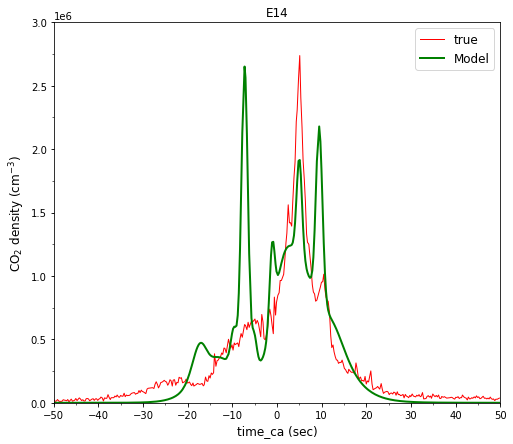

In [163]:
#绘图
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

fig,ax1=plt.subplots(figsize=(8,7))
xaxis=ax1.xaxis
yaxis=ax1.yaxis

#ax1.plot(co2_2.tca[vertex_j],co2_2.dens[vertex_j],"x",label="",color="purple",linewidth=2)   #挑mach数试验语句
#ax1.plot(zone.x1,zone.y1,'o',label="",color="purple",linewidth=2)
#ax1.plot(zone.x2,zone.y2,'o',label="",color="purple",linewidth=2)
#ax1.axvline(x=zone.x1[1],ymax=zone.y1[1]/3.0e6,color="purple",linestyle='--')
#ax1.axvline(x=zone.x1[2],ymax=zone.y1[2]/3.0e6,color="purple",linestyle='--')
#ax1.axvline(x=zone.x1[3],ymax=zone.y1[3]/3.0e6,color="purple",linestyle='--')
#ax1.axvline(x=zone.x1[4],ymax=zone.y1[4]/3.0e6,color="purple",linestyle='--')
#ax1.scatter(co2.tca,co2.dens2,label="E14 INMS: CO$_{2}$",color="black",s=7)
ax1.plot(co2.tca,co2.dens2,label="true",color="red",linewidth=1)
#ax1.plot(co2_2.tca[0:np.int(zone.owaru[0])+1],co2_2.dens[0:np.int(zone.owaru[0])+1],label="Interval 1",color="blue",linewidth=2)
#ax1.plot(co2_2.tca[np.int(zone.hajime[1]):np.int(zone.owaru[1])+1],co2_2.dens[np.int(zone.hajime[1]):np.int(zone.owaru[1])+1],label="Interval 2",color="orange",linewidth=2)   
#ax1.plot(co2_2.tca[np.int(zone.hajime[2]):np.int(zone.owaru[2])+1],co2_2.dens[np.int(zone.hajime[2]):np.int(zone.owaru[2])+1],label="Interval 3",color="red",linewidth=2)
#ax1.plot(co2_2.tca[np.int(zone.hajime[3]):np.int(zone.owaru[3])+1],co2_2.dens[np.int(zone.hajime[3]):np.int(zone.owaru[3])+1],label="Interval 4",color="green",linewidth=2)
#ax1.plot(co2_2.tca[np.int(zone.hajime[4]):len(co2)+1],co2_2.dens[np.int(zone.hajime[4]):len(co2)+1],label="Interval 5",color="gray",linewidth=1)
ax1.plot(co2_2.tca,co2_2.total_density,label="Model",color="green",linewidth=2)

ax1.set_xlim(-50,50)
ax1.set_ylim(0,3000000)
ax1.set_xlabel("time_ca (sec)",fontsize=(12))
ax1.set_ylabel(r"CO$_{2}$ density (cm$^{-3}$)",fontsize=(12))
ax1.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax1.legend(fontsize=(12))

plt.title("E14")
#plt.yscale("log")
#plt.grid()
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(5.0E5))
ax1.yaxis.set_minor_locator(MultipleLocator(2.5E5))
#for tick in ax.yaxis.get_major_ticks():
    #tick.label1.set_fontsize(14)
#for tick in ax.xaxis.get_major_ticks():
    #tick.label1.set_fontsize(14)
#for line in xaxis.get_ticklines():
    #line.set_markersize(6)
#for line in yaxis.get_ticklines():
    #line.set_markersize(6)
#plt.savefig("/Users/fumenghao/Desktop/CUI/TASK_8_PRO2/E14_s.pdf")
plt.show()
#怎么设置副刻度长短，怎么让刻度在里面？

In [25]:
#co2_2.to_csv("/Users/fumenghao/Desktop/co2/TASK_5/secondtime/E_CO2.CSV",index=False)

In [ ]:
from scipy import special
#计算thermal velocity
thv=np.sqrt(2*(1.3806485*10**(-23))*180/(7.31063*10**(-26)))*100
#计算source rate专用
def src(v_th,s,M):
    Source_Rate=s*v_th*(np.exp(-M**2)*(2/np.sqrt(np.pi)-1/M)+(1/M+2*M)*(1+special.erf(M)))
    return(Source_Rate) 
#计算逃逸率
Source_Rate=np.zeros(98)
Source_Rate[0]=src(thv,s0391,M1)
Source_Rate[1]=src(thv,s0391,M2)
Source_Rate[2]=src(thv,s0391,M3)
Source_Rate[3]=src(thv,s0391,M4)
Source_Rate[4]=src(thv,s0535,M5)
Source_Rate[5]=src(thv,s0535,M6)
Source_Rate[6]=src(thv,s0472,M7)
Source_Rate[7]=src(thv,s0472,M8)
Source_Rate[8]=src(thv,s0472,M9)
Source_Rate[9]=src(thv,s0351,M10)
Source_Rate[10]=src(thv,s0351,M11)
Source_Rate[11]=src(thv,s0351,M12)
Source_Rate[12]=src(thv,s0129,M13)
Source_Rate[13]=src(thv,s0129,M14)
Source_Rate[14]=src(thv,s0129,M15)
Source_Rate[15]=src(thv,s0,M16)
Source_Rate[16]=src(thv,s0,M17)
Source_Rate[17]=src(thv,s0063,M18)
Source_Rate[18]=src(thv,s0063,M19)
Source_Rate[19]=src(thv,s0063,M20)
Source_Rate[20]=src(thv,s0354,M21)
Source_Rate[21]=src(thv,s0354,M22)
Source_Rate[22]=src(thv,s0036,M23)
Source_Rate[23]=src(thv,s0036,M24)
Source_Rate[24]=src(thv,s0427,M25)
Source_Rate[25]=src(thv,s0427,M26)
Source_Rate[26]=src(thv,s0427,M27)
Source_Rate[27]=src(thv,s0427,M28)
Source_Rate[28]=src(thv,s0498,M29)
Source_Rate[29]=src(thv,s0498,M30)
Source_Rate[30]=src(thv,s0498,M31)
Source_Rate[31]=src(thv,s0498,M32)
Source_Rate[32]=src(thv,s0662,M33)
Source_Rate[33]=src(thv,s0662,M34)
Source_Rate[34]=src(thv,s0662,M35)
Source_Rate[35]=src(thv,s0662,M36)
Source_Rate[36]=src(thv,s0845,M37)
Source_Rate[37]=src(thv,s0845,M38)
Source_Rate[38]=src(thv,s0845,M39)
Source_Rate[39]=src(thv,s0845,M40)
Source_Rate[40]=src(thv,s0845,M41)
Source_Rate[41]=src(thv,s0609,M42)
Source_Rate[42]=src(thv,s0609,M43)
Source_Rate[43]=src(thv,s0609,M44)
Source_Rate[44]=src(thv,s0289,M45)
Source_Rate[45]=src(thv,s0289,M46)
Source_Rate[46]=src(thv,s0189,M47)
Source_Rate[47]=src(thv,s0189,M48)
Source_Rate[48]=src(thv,s0102,M49)
Source_Rate[49]=src(thv,s0102,M50)
Source_Rate[50]=src(thv,s0139,M51)
Source_Rate[51]=src(thv,s0139,M52)
Source_Rate[52]=src(thv,s0139,M53)
Source_Rate[53]=src(thv,s0427,M54)
Source_Rate[54]=src(thv,s0498,M55)
Source_Rate[55]=src(thv,s0498,M56)
Source_Rate[56]=src(thv,s0498,M57)
Source_Rate[57]=src(thv,s0498,M58)
Source_Rate[58]=src(thv,s0662,M59)
Source_Rate[59]=src(thv,s0444,M60)
Source_Rate[60]=src(thv,s0444,M61)
Source_Rate[61]=src(thv,s0548,M62)
Source_Rate[62]=src(thv,s0548,M63)
Source_Rate[63]=src(thv,s0548,M64)
Source_Rate[64]=src(thv,s0548,M65)
Source_Rate[65]=src(thv,s1,M66)
Source_Rate[66]=src(thv,s1,M67)
Source_Rate[67]=src(thv,s1,M68)
Source_Rate[68]=src(thv,s1,M69)
Source_Rate[69]=src(thv,s1,M70)
Source_Rate[70]=src(thv,s0868,M71)
Source_Rate[71]=src(thv,s0868,M72)
Source_Rate[72]=src(thv,s0868,M73)
Source_Rate[73]=src(thv,s0868,M74)
Source_Rate[74]=src(thv,s0673,M75)
Source_Rate[75]=src(thv,s0673,M76)
Source_Rate[76]=src(thv,s0276,M77)
Source_Rate[77]=src(thv,s0276,M78)
Source_Rate[78]=src(thv,s0276,M79)
Source_Rate[79]=src(thv,s022,M80)
Source_Rate[80]=src(thv,s022,M81)
Source_Rate[81]=src(thv,s022,M82)
Source_Rate[82]=src(thv,s0444,M83)
Source_Rate[83]=src(thv,s0444,M84)
Source_Rate[84]=src(thv,s0444,M85)
Source_Rate[85]=src(thv,s0444,M86)
Source_Rate[86]=src(thv,s0548,M87)
Source_Rate[87]=src(thv,s0548,M88)
Source_Rate[88]=src(thv,s0254,M89)
Source_Rate[89]=src(thv,s0293,M90)
Source_Rate[90]=src(thv,s0367,M91)
Source_Rate[91]=src(thv,s035,M92)
Source_Rate[92]=src(thv,s035,M93)
Source_Rate[93]=src(thv,s0354,M94)
Source_Rate[94]=src(thv,s0036,M95)
Source_Rate[95]=src(thv,s0,M96)
Source_Rate[96]=src(thv,s0,M97)
Source_Rate[97]=src(thv,s0282,M98)
#total
total_Source_Rate=np.sum(Source_Rate)
#转换成质量单位
total_Source_Rate/(6.02E23)*0.04401

In [78]:
np.(0,100,1)

array([ 0.])

In [5]:
import numpy as np
from scipy import special
def R(M_2):
    R=(np.exp(-M_2**2)*(2/np.sqrt(np.pi)-1/M_2)+(1/M_2+2*M_2)*(1+special.erf(M_2)))
    return(R)
1/R(0)
#import matplotlib.pyplot as plt
#x=np.arange(-100,100,1)
#fig,ax1=plt.subplots()
#xaxis=ax1.xaxis
#yaxis=ax1.yaxis

#ax1.plot(x,R(x))

#plt.show()

ZeroDivisionError: division by zero

In [ ]:
#y2,y1=np.array([]),np.array([]) #记录区间
#h2,h1=np.array([]),np.array([]) #记录马赫数
#for p2 in MA:
    #if zone.hajime[0] <= kiroku2[p2].median() and zone.owaru[0] >= kiroku2[p2].median():
        #y2=np.append(y2,0)
        #h2=np.append(h2,p2)
    #elif zone.hajime[1] <= kiroku2[p2].median() and zone.owaru[1] >= kiroku2[p2].median():
        #y2=np.append(y2,1)  
        #h2=np.append(h2,p2)
    #elif zone.hajime[2] <= kiroku2[p2].median() and zone.owaru[2] >= kiroku2[p2].median():
        #y2=np.append(y2,2)  
        #h2=np.append(h2,p2)
    #elif zone.hajime[3] <= kiroku2[p2].median() and zone.owaru[3] >= kiroku2[p2].median():
        #y2=np.append(y2,3) 
        #h2=np.append(h2,p2)
    #else:
        #pass
#for p1 in MB:
    #if zone.hajime[0] <= kiroku1[p1].median() and zone.owaru[0] >= kiroku1[p1].median():
        #y1=np.append(y1,0)
        #h1=np.append(h1,p1)
    #elif zone.hajime[1] <= kiroku1[p1].median() and zone.owaru[1] >= kiroku1[p1].median():
        #y1=np.append(y1,1)  
        #h1=np.append(h1,p1)
    #elif zone.hajime[2] <= kiroku1[p1].median() and zone.owaru[2] >= kiroku1[p1].median():
        #y1=np.append(y1,2)  
        #h1=np.append(h1,p1)
    #elif zone.hajime[3] <= kiroku1[p1].median() and zone.owaru[3] >= kiroku1[p1].median():
        #y1=np.append(y1,3) 
        #h1=np.append(h1,p1)
    #else:
        #pass
#h2,h1,y2,y1=h2.astype(int),h1.astype(int),y2.astype(int),y1.astype(int)
#h0=np.arange(1,99,1)
#h0=np.setdiff1d(h0,h1)
#h0=np.setdiff1d(h0,h2)
#h0=h0.astype(int)
#print(h2)
#print(y2)
#print(h1)
#print(h0)
#print(len(h2)+len(h1)+len(h0))

In [ ]:
#局部拟合
S0=np.array([0.391,0.391,0.391,0.391,0.535,0.535,0.472,0.472,0.472,0.351,0.351,0.351,0.129,0.129,0.129,0,0,0.063,0.063,0.063,0.354,0.354,0.036,0.036,0.427,0.427,0.427,0.427,0.498,0.498,0.498,0.498,0.662,0.662,0.662,0.662,0.845,0.845,0.845,0.845,0.845,0.609,0.609,0.609,0.289,0.289,0.189,0.189,0.102,0.102,0.139,0.139,0.139,0.427,0.498,0.498,0.498,0.498,0.662,0.444,0.444,0.548,0.548,0.548,0.548,1,1,1,1,1,0.868,0.868,0.868,0.868,0.673,0.673,0.276,0.276,0.276,0.22,0.22,0.22,0.444,0.444,0.444,0.444,0.548,0.548,0.254,0.293,0.367,0.35,0.35,0.354,0.036,0,0,0.282]) 
#C1,C2=popt[0],popt[1]
C1,C2=1.0E19,4
S=C1*(S0**C2)

M=np.full(98,1.0E-8)
ma,mb,mo=12,4,1.0E-8
#for i in (MA-1):
    #M[i]=ma
#for j in (MB-1):
    #M[j]=mb
#for k in (MO-1):
    #M[k]=ma
#0
#2
trial2=list(itertools.product([ma,mb,mo],repeat=4))
YAMATO2=pd.DataFrame(0.0,index=np.arange(zone.hajime[2],zone.owaru[2]+1,1),columns=np.arange(len(trial2)))
for i in np.arange(len(trial2)):
    M[32-1],M[34-1],M[39-1],M[59-1]=trial2[i]
    sa=(Local_Density(S,M,zone.hajime[2],zone.owaru[2]+1)-co2_2.dens[np.int(zone.hajime[2]):np.int(zone.owaru[2]+1)])**2  #有待商榷               
    YAMATO2[i]=sa
yamato2=YAMATO2.sum(axis=0)
M[32-1],M[34-1],M[39-1],M[59-1]=trial2[yamato2.loc[yamato2==yamato2.min()].index.values[0]]

#trial22=list(itertools.product([ma,mb,mo],repeat=7))
#YAMATO22=pd.DataFrame(0.0,index=np.arange(zone.hajime[2],zone.owaru[2]+1,1),columns=np.arange(len(trial22)))
#for i in np.arange(len(trial22)):
    #M[36-1],M[37-1],M[38-1],M[40-1],M[56-1],M[58-1],M[73-1]=trial22[i]
    #sa=(Local_Density(S,M,zone.hajime[2],zone.owaru[2]+1)-co2_2.dens[np.int(zone.hajime[2]):np.int(zone.owaru[2]+1)])**2  #有待商榷               
    #YAMATO22[i]=sa
#yamato22=YAMATO22.sum(axis=0)
#M[36-1],M[37-1],M[38-1],M[40-1],M[56-1],M[58-1],M[73-1]=trial22[yamato22.loc[yamato22==yamato22.min()].index.values[0]]
#3
#trial3=list(itertools.product([ma,mb,mo],repeat=3))
#YAMATO3=pd.DataFrame(0.0,index=np.arange(zone.hajime[3],zone.owaru[3]+1,1),columns=np.arange(len(trial3)))
#for i in np.arange(len(trial3)):
    #M[31-1],M[54-1],M[55-1]=trial3[i]
    #sa=(Local_Density(S,M,zone.hajime[3],zone.owaru[3]+1)-co2_2.dens[np.int(zone.hajime[3]):np.int(zone.owaru[3]+1)])**2  #有待商榷               
    #YAMATO3[i]=sa
#yamato3=YAMATO3.sum(axis=0)
#M[31-1],M[54-1],M[55-1]=trial3[yamato3.loc[yamato3==yamato3.min()].index.values[0]]

#trial33=list(itertools.product([ma,mb,mo],repeat=5))
#YAMATO33=pd.DataFrame(0.0,index=np.arange(zone.hajime[3],zone.owaru[3]+1,1),columns=np.arange(len(trial33)))
#for i in np.arange(len(trial33)):
    #M[26-1],M[27-1],M[28-1],M[35-1],M[57-1]=trial33[i]
    #sa=(Local_Density(S,M,zone.hajime[3],zone.owaru[3]+1)-co2_2.dens[np.int(zone.hajime[3]):np.int(zone.owaru[3]+1)])**2  #有待商榷               
    #YAMATO33[i]=sa
#yamato33=YAMATO33.sum(axis=0)
#M[26-1],M[27-1],M[28-1],M[35-1],M[57-1]=trial33[yamato33.loc[yamato33==yamato33.min()].index.values[0]]
#1
#trial1=list(itertools.product([ma,mb,mo],repeat=7))
#YAMATO1=pd.DataFrame(0.0,index=np.arange(zone.hajime[1],zone.owaru[1]+1,1),columns=np.arange(len(trial1)))
#for i in np.arange(len(trial1)):
    #M[15-1],M[18-1],M[42-1],M[43-1],M[44-1],M[46-1],M[47-1]=trial1[i]
    #sa=(Local_Density(S,M,zone.hajime[1],zone.owaru[1]+1)-co2_2.dens[np.int(zone.hajime[1]):np.int(zone.owaru[1]+1)])**2  #有待商榷               
    #YAMATO1[i]=sa
#yamato1=YAMATO1.sum(axis=0)
#M[15-1],M[18-1],M[42-1],M[43-1],M[44-1],M[46-1],M[47-1]=trial1[yamato1.loc[yamato1==yamato1.min()].index.values[0]]

#trial11=list(itertools.product([ma,mb,mo],repeat=5))
#YAMATO11=pd.DataFrame(0.0,index=np.arange(zone.hajime[1],zone.owaru[1]+1,1),columns=np.arange(len(trial11)))
#for i in np.arange(len(trial11)):
    #M[11-1],M[13-1],M[16-1],M[19-1],M[45-1]=trial11[i]
    #sa=(Local_Density(S,M,zone.hajime[1],zone.owaru[1]+1)-co2_2.dens[np.int(zone.hajime[1]):np.int(zone.owaru[1]+1)])**2  #有待商榷               
    #YAMATO11[i]=sa
#yamato11=YAMATO11.sum(axis=0)
#M[11-1],M[13-1],M[16-1],M[19-1],M[45-1]=trial11[yamato11.loc[yamato11==yamato11.min()].index.values[0]]
#4
#trial4=list(itertools.product([ma,mb,mo],repeat=4))
#YAMATO4=pd.DataFrame(0.0,index=np.arange(zone.hajime[4],373,1),columns=np.arange(len(trial4)))
#for i in np.arange(len(trial4)):
    #M[1-1],M[25-1],M[30-1],M[97-1]=trial4[i]
    #sa=(Local_Density(S,M,zone.hajime[4],373)-co2_2.dens[np.int(zone.hajime[4]):np.int(373)])**2  #有待商榷               
    #YAMATO4[i]=sa
#yamato4=YAMATO4.sum(axis=0)
#M[1-1],M[25-1],M[30-1],M[97-1]=trial4[yamato4.loc[yamato4==yamato4.min()].index.values[0]]